In [46]:
import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mpt
import seaborn as sns

df = pd.read_csv('data.csv')

# Chuẩn hóa và làm sạch

In [47]:
def convert(x):
    if '/' not in x:
        return x
    else:
        tmp = x.split('/')
        return tmp[0] + '-' + tmp[1] + '-' + tmp[2]

def to_date(x):
    return dt.datetime.strptime(x, '%d-%m-%Y')

df['Order Date'] = df['Order Date'].apply(convert).apply(to_date)
df['Ship Date'] = df['Ship Date'].apply(convert).apply(to_date)


set1 = set(df['Order ID'][df['Segment'] == 'Consumer'].unique()) & set(df['Order ID'][df['Segment'] == 'Home Office'].unique())
set2 = set(df['Order ID'][df['Segment'] == 'Consumer'].unique()) & set(df['Order ID'][df['Segment'] == 'Corporate'].unique())
set3 = set(df['Order ID'][df['Segment'] == 'Home Office'].unique()) & set(df['Order ID'][df['Segment'] == 'Corporate'].unique())

error1 = list(set1)
error2 = list(set2)
error3 = list(set3)

temp = np.unique(error1 + error2 + error3)
for i in temp:
    df.drop(df.loc[df['Order ID']==i].index, inplace=True)
    
df['Region'] = df['Market'] + ' ' + df['Region']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49560 entries, 0 to 51279
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        49560 non-null  object        
 1   Order Date      49560 non-null  datetime64[ns]
 2   Ship Date       49560 non-null  datetime64[ns]
 3   Ship Mode       49560 non-null  object        
 4   Customer ID     49560 non-null  object        
 5   Customer Name   49560 non-null  object        
 6   Segment         49560 non-null  object        
 7   City            49560 non-null  object        
 8   State           49560 non-null  object        
 9   Country         49560 non-null  object        
 10  Market          49560 non-null  object        
 11  Region          49560 non-null  object        
 12  Product ID      49560 non-null  object        
 13  Category        49560 non-null  object        
 14  Sub-Category    49560 non-null  object        
 15  Pr

In [49]:
df2['Year']=df2['Order Date'].dt.year
df2['Month']=df2['Order Date'].dt.month
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49560 entries, 0 to 51279
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        49560 non-null  object        
 1   Order Date      49560 non-null  datetime64[ns]
 2   Ship Date       49560 non-null  datetime64[ns]
 3   Ship Mode       49560 non-null  int32         
 4   Customer ID     49560 non-null  object        
 5   Customer Name   49560 non-null  object        
 6   Segment         49560 non-null  int32         
 7   City            49560 non-null  object        
 8   State           49560 non-null  object        
 9   Country         49560 non-null  object        
 10  Market          49560 non-null  object        
 11  Region          49560 non-null  int32         
 12  Product ID      49560 non-null  object        
 13  Category        49560 non-null  object        
 14  Sub-Category    49560 non-null  object        
 15  Pr

# Khách hàng

In [3]:
# Tổng số đơn hàng 4 năm
order_total = len(df['Order ID'].value_counts())

years = np.arange(2011, 2015)

# Số lượng đơn hàng từng năm
year_order = []
for i in years:
    year_order.append(len(df['Order ID'][df['Order Date'].dt.year == i].value_counts()))

# Trung bình 1 năm có bao nhiêu đơn hàng
year_mean = np.mean(year_order)

# Đơn hàng mỗi năm chiếm bao nhiêu %
year_order_rate = np.array(year_order)/order_total*100

In [4]:
# Số lượng order theo từng nhóm khách hàng
seg_order = []
segment = df['Segment'].unique()

for i in segment:
    seg_order.append(len(df['Order ID'][df['Segment'] == i].value_counts()))

# Trung bình 1 nhóm khách hàng có bao nhiêu đơn hàng
np.mean(seg_order)

# Từng nhóm khách hàng chiếm bao nhiêu %
seg_order_rate = np.array(seg_order)/order_total*100

# Số lượng order từng nhóm khách hàng theo từng năm
seg_year_order = []

for i in years:
    temp = []
    for j in segment:
        temp.append(len(df['Order ID'][(df['Order Date'].dt.year == i)&(df['Segment'] == j)].value_counts()))
    seg_year_order.append(temp)

In [5]:
# 5 quốc gia có số lượng order nhiều nhất
country = np.unique(df['Country'])

value, count = [], []
for i in country:
    value.append(i)
    count.append(len(df['Order ID'][df['Country'] == i].value_counts()))
index = np.lexsort([value, count])[::-1][0:5]

country_5 = np.array(value)[index]
country_5_value = np.array(count)[index]

# Chiếm bao nhiêu %
country_5_rate = country_5_value/order_total*100

# 5 quốc gia có số lượng order nhiều nhất theo từng năm
country_5_year, country_5_year_value = [], []
for j in years:
    value, count = [], []
    for i in country:
        value.append(i)
        count.append(len(df['Order ID'][(df['Country'] == i) & (df['Order Date'].dt.year == j)].value_counts()))
    index = np.lexsort([value, count])[::-1][0:5]
    country_5_year.append(np.array(value)[index])
    country_5_year_value.append(np.array(count)[index])

country_5_year = np.array(country_5_year)
country_5_year_value = np.array(country_5_year_value)

In [6]:
# 5 khu vực có số lượng order nhiều nhất
area = np.unique(df['Region'])
years = np.arange(2011, 2015)
value, count = [], []
for i in area:
    value.append(i)
    count.append(len(df['Order ID'][df['Region'] == i].value_counts()))
index = np.lexsort([value, count])[::-1][0:5]

area_5 = np.array(value)[index]
area_5_value = np.array(count)[index]

# Chiếm bao nhiêu %
area_5_rate = area_5_value/order_total*100

# 5 khu vực có số lượng order nhiều nhất theo từng khu vực
area_5_year, area_5_year_value = [], []
for i in years:
    value, count = [], []
    for j in area:
        value.append(j)
        count.append(len(df['Order ID'][(df['Region'] == j)&(df['Order Date'].dt.year ==i)].value_counts()))
        index = np.lexsort([value, count])[::-1][0:5]
    area_5_year.append(np.array(value)[index])
    area_5_year_value.append(np.array(count)[index])

area_5_year = np.array(area_5_year)
area_5_year_value = np.array(area_5_year_value)

# Doanh thu

In [7]:
# Tổng doanh thu 4 năm (USD)
sale_total = round(df['Sales'].sum(), 2) 

# Doanh thu từng năm
year_sale = []


for i in years:
    year_sale.append(round(np.sum(df['Sales'][df['Order Date'].dt.year == i]),2))

# Doanh thu từng năm chiếm bao nhiêu % tổng doanh thu
year_sale_rate = np.array(year_sale)/sale_total*100

# Doanh thu theo từng nhóm khách hàng 
seg_sale, seg_sale_rate = [], []
for i in segment:
    seg_sale.append(round(np.sum(df['Sales'][df['Segment'] == i]),2))
    
# Chiếm bao nhiêu %
seg_sale_rate = np.array(seg_sale)/sale_total*100

# Doanh thu từng nhóm khách hàng theo từng năm
seg_year_sale = []

for i in years:
    tmp = []
    for j in segment:
        tmp.append(round(np.sum(df['Sales'][(df['Segment'] == j) & (df['Order Date'].dt.year == i)]),2))
    seg_year_sale.append(tmp)

In [8]:
# Doanh thu trung bình 1 năm
year_sale_mean = np.array(year_sale).mean()

# 5 quốc gia có doanh thu cao nhất

country_5_sale, country_5_sale_value = [], []

for i in country:
    country_5_sale_value.append(round(np.sum(df['Sales'][df['Country'] == i]),2))

index = np.lexsort([country, country_5_sale_value])[::-1][0:5]

country_5_sale = country[index]
country_5_sale_value = np.array(country_5_sale_value)[index]

# Chiếm bao nhiêu % tổng doanh thu 
country_5_sale_rate = country_5_sale_value / sale_total * 100


# 5 quốc gia có doanh thu cao nhất theo từng năm

country_5_year_sale, country_5_year_sale_value = [], []

for i in years:
    tmp, tmp1 = [], []
    for j in country:
        tmp.append(j)
        tmp1.append(round(np.sum(df['Sales'][(df['Country'] == j) & (df['Order Date'].dt.year == i)]),2))
    idx = np.lexsort([tmp, tmp1])[::-1][0:5]
    country_5_year_sale.append(np.array(tmp)[idx])
    country_5_year_sale_value.append(np.array(tmp1)[idx])

In [9]:
# 5 khu vực có doanh thu cao nhất

sale_total = round(df['Sales'].sum(), 2) 
area = np.unique(df['Region'])
years = np.arange(2011, 2015)

area_5_sale, area_5_sale_value = [], []
value = []
for i in area:
    value.append(i)
    area_5_sale_value.append(round(np.sum(df['Sales'][df['Region'] == i]),2))
    
index = np.lexsort([value, area_5_sale_value])[::-1][0:5]

area_5_sale = np.array(value)[index]
area_5_sale_value = np.array(area_5_sale_value)[index]

# Chiếm bao nhiêu % tổng doanh thu 
area_5_sale_rate = area_5_sale_value / sale_total * 100

area_5_year_sale, area_5_year_sale_value = [], []

for i in years:
    tmp, tmp1 = [], []
    for j in area:
        tmp.append(j)
        tmp1.append(round(np.sum(df['Sales'][(df['Region'] == j) & (df['Order Date'].dt.year == i)]),2))
    idx = np.lexsort([tmp, tmp1])[::-1][0:5]
    area_5_year_sale.append(np.array(tmp)[idx])
    area_5_year_sale_value.append(np.array(tmp1)[idx])

# Sản phẩm

In [55]:
# 5 dòng sản phẩm bán chạy nhất
product = np.unique(df['Sub-Category'])

product_order,product_order1, product_order_value,product_order_value1, product_order_rate = [], [], [], [], []

for i in product:
    product_order_value.append(round(np.sum(df['Quantity'][df['Sub-Category'] == i]),2))
    product_order_value1.append(round(np.sum(df['Quantity'][df['Sub-Category'] == i]),2))

index = np.lexsort([product, product_order_value])[::-1][0:5]
index1 = np.lexsort([product, product_order_value1])[::-1]

product_order = product[index]
product_order1 = product[index1]
product_order_value = np.array(product_order_value)[index]
product_order_value1 = np.array(product_order_value1)

# Chiếm bao nhiêu %
product_order_rate = product_order_value / np.sum(df['Quantity']) * 100

# 5 dòng sản phẩm bán chạy theo từng năm

product = df['Sub-Category'].unique()
product_5_year_sale, product_5_year_sale_value = [], []

for i in years:
    tmp, tmp1 = [], []
    for j in product:
        tmp.append(j)
        tmp1.append(round(np.sum(df['Quantity'][(df['Sub-Category'] == j) & (df['Order Date'].dt.year == i)]),2))
    idx = np.lexsort([tmp, tmp1])[::-1][0:5]
    product_5_year_sale.append(np.array(tmp)[idx])
    product_5_year_sale_value.append(np.array(tmp1)[idx])

# 5 dòng sản phẩm bán chạy theo từng khu vực

area = df['Region'].unique()
product_5_area_sale, product_5_area_sale_value = [], []

for i in area:
    tmp, tmp1 = [], []
    for j in product:
        tmp.append(j)
        tmp1.append(round(np.sum(df['Quantity'][(df['Sub-Category'] == j) & (df['Region'] == i)]),2))
    idx = np.lexsort([tmp, tmp1])[::-1][0:5]
    product_5_area_sale.append(np.array(tmp)[idx])
    product_5_area_sale_value.append(np.array(tmp1)[idx])


In [11]:
# 5 dòng sản phẩm có doanh thu cao nhất
product = df['Sub-Category'].unique()

product_sale, product_sale_value, product_sale_rate = [], [], []

for i in product:
    product_sale_value.append(round(np.sum(df['Sales'][df['Sub-Category'] == i]),2))

index = np.lexsort([product, product_sale_value])[::-1][0:5]

product_sale = product[index]
product_sale_value = np.array(product_sale_value)[index]

# Chiếm bao nhiêu % tổng doanh thu 
product_sale_rate = product_sale_value / sale_total * 100


# NOTE: 5 dòng sản phẩm bán chạy nhất không mang lại doanh thu cao nhất

In [12]:
# 5 dòng sản phẩm doanh thu cao nhất theo từng năm

years = np.arange(2011, 2015)
product_5_year_sale1, product_5_year_sale_value1 = [], []

for i in years:
    tmp, tmp1 = [], []
    for j in product:
        tmp.append(j)
        tmp1.append(round(np.sum(df['Sales'][(df['Sub-Category'] == j) & (df['Order Date'].dt.year == i)]),2))
    idx = np.lexsort([tmp, tmp1])[::-1][0:5]
    product_5_year_sale1.append(np.array(tmp)[idx])
    product_5_year_sale_value1.append(np.array(tmp1)[idx])
    
# 5 dòng sản phẩm doanh thu cao nhất theo từng khu vực

area = df['Region'].unique()
product_5_area_sale1, product_5_area_sale_value1 = [], []

for i in area:
    tmp, tmp1 = [], []
    for j in product:
        tmp.append(j)
        tmp1.append(round(np.sum(df['Sales'][(df['Sub-Category'] == j) & (df['Region'] == i)]),2))
    idx = np.lexsort([tmp, tmp1])[::-1][0:5]
    product_5_area_sale1.append(np.array(tmp)[idx])
    product_5_area_sale_value1.append(np.array(tmp1)[idx])

In [13]:
# Tiền ship trung bình của các dòng hàng 
ship_cost = []
product = df['Sub-Category'].unique()
for i in product:
    ship_cost.append(round(df['Shipping Cost'][df['Sub-Category'] == i].mean(), 2))

# Tiền ship trung bình theo từng khu vực
area = df['Region'].unique()
area_ship_cost = []

for i in area:
    area_ship_cost.append(round(df['Shipping Cost'][df['Region'] == i].mean(), 2))
    

# Kết quả phân tích

## Khách hàng

In [14]:
print(f'1. Tổng số lượng đơn hàng trong 4 năm: {order_total} đơn hàng.')
print('2. Số lượng đơn hàng từng năm:')
for i in range(len(year_order)):
    print(f'\tNăm {i + 2011}: {year_order[i]} đơn hàng, chiếm {year_order_rate[i]}% tổng số đơn.')
print(f'3. Trung bình mỗi năm có {year_mean} đơn hàng.')
print(f'4. Số lượng đơn theo từng nhóm khách hàng:')
for i in range(len(segment)):
    print(f'\tNhóm {segment[i]}: {seg_order[i]} đơn hàng, chiếm {round(seg_order_rate[i], 2)}% tổng đơn.')
print(f'5. Trung bình một nhóm khách hàng có {round(np.mean(seg_order))} đơn hàng.')
print('6. Số lượng order từng nhóm khách hàng qua từng năm:')
print(pd.DataFrame(seg_year_order, index = years, columns = segment))
print('7. 5 quốc gia có lượng đơn hàng nhiều nhất:')
for i in range(len(area_5)):
    print(f'\t{i+1}. {country_5[i]} với {country_5_value[i]} đơn hàng, chiếm {round(country_5_rate[i], 2)} % tổng số đơn')
print('8. 5 quốc gia có lượng đơn hàng nhiều nhất theo từng năm:')
for i in range(len(years)):
    print(f'\tNăm {years[i]}:')
    for j in range(len(country_5_year)+1):
        print(f'\t\t{j+1}. {country_5_year[i][j]}, với {country_5_year_value[i][j]} đơn')
print('9. 5 khu vực có lượng đơn hàng nhiều nhất:')
for i in range(len(area_5)):
    print(f'\t{i+1}. {area_5[i]} với {area_5_value[i]} đơn hàng, chiếm {round(area_5_rate[i], 2)} % tổng số đơn')
print('10. 5 area có lượng đơn hàng nhiều nhất theo từng năm:')
for i in range(len(years)):
    print(f'\tNăm {years[i]}:')
    for j in range(len(area_5_year)+1):
        print(f'\t\t{j+1}. {area_5_year[i][j]}, với {area_5_year_value[i][j]} đơn')

1. Tổng số lượng đơn hàng trong 4 năm: 24611 đơn hàng.
2. Số lượng đơn hàng từng năm:
	Năm 2011: 4390 đơn hàng, chiếm 17.837552314005933% tổng số đơn.
	Năm 2012: 5256 đơn hàng, chiếm 21.356304091666328% tổng số đơn.
	Năm 2013: 6622 đơn hàng, chiếm 26.906667750193% tổng số đơn.
	Năm 2014: 8343 đơn hàng, chiếm 33.899475844134734% tổng số đơn.
3. Trung bình mỗi năm có 6152.75 đơn hàng.
4. Số lượng đơn theo từng nhóm khách hàng:
	Nhóm Consumer: 12765 đơn hàng, chiếm 51.87% tổng đơn.
	Nhóm Corporate: 7363 đơn hàng, chiếm 29.92% tổng đơn.
	Nhóm Home Office: 4483 đơn hàng, chiếm 18.22% tổng đơn.
5. Trung bình một nhóm khách hàng có 8204 đơn hàng.
6. Số lượng order từng nhóm khách hàng qua từng năm:
      Consumer  Corporate  Home Office
2011      2323       1304          763
2012      2786       1560          910
2013      3357       2033         1232
2014      4299       2466         1578
7. 5 quốc gia có lượng đơn hàng nhiều nhất:
	1. United States với 4983 đơn hàng, chiếm 20.25 % tổng số đ

## Doanh thu

In [15]:
print(f'1. Tống doanh thu qua 4 năm: {sale_total} USD')
print(f'2. Doanh thu qua từng năm:')
for i in range(len(years)):
    print(f'\t Năm {years[i]}: {year_sale[i]} USD')
print(f'3. Doanh thu trung bình 1 năm: {round(year_sale_mean, 2)} USD')
print(f'4. Doanh thu theo từng nhóm khách hàng:')
for i in range(len(segment)):
    print(f'\tNhóm {segment[i]}: {seg_sale[i]} USD, chiếm {round(seg_sale_rate[i], 2)}% tổng doanh thu.')
    
print('5. Doanh thu từng nhóm khách hàng qua từng năm: (USD)')
print(pd.DataFrame(seg_year_sale, index = years, columns = segment))
print('6. 5 quốc gia có doanh thu cao nhất:')
for i in range(len(country_5_sale)):
    print(f'\t{i+1}. {country_5_sale[i]} với {country_5_sale_value[i]} USD, chiếm {round(country_5_sale_rate[i], 2)} % tổng doanh thu')
print('7. 5 quốc gia có doanh thu cao nhất theo từng năm:')
for i in range(len(years)):
    print(f'\tNăm {years[i]}:')
    for j in range(len(country_5_year_sale)+1):
        print(f'\t\t{j+1}. {country_5_year_sale[i][j]}, với {country_5_year_sale_value[i][j]} USD')
print('8. 5 khu vực có doanh thu cao nhất:')
for i in range(len(area_5_sale)):
    print(f'\t{i+1}. {area_5_sale[i]} với {area_5_sale_value[i]} USD, chiếm {round(area_5_sale_rate[i], 2)} % tổng doanh thu')
print('9. 5 khu vực có doanh thu cao nhất theo từng năm:')
for i in range(len(years)):
    print(f'\tNăm {years[i]}:')
    for j in range(len(area_5_year_sale)+1):
        print(f'\t\t{j+1}. {area_5_year_sale[i][j]}, với {area_5_year_sale_value[i][j]} USD')

1. Tống doanh thu qua 4 năm: 12213578.6 USD
2. Doanh thu qua từng năm:
	 Năm 2011: 2213315.33 USD
	 Năm 2012: 2593345.62 USD
	 Năm 2013: 3317432.34 USD
	 Năm 2014: 4089485.31 USD
3. Doanh thu trung bình 1 năm: 3053394.65 USD
4. Doanh thu theo từng nhóm khách hàng:
	Nhóm Consumer: 6344253.41 USD, chiếm 51.94% tổng doanh thu.
	Nhóm Corporate: 3667866.26 USD, chiếm 30.03% tổng doanh thu.
	Nhóm Home Office: 2201458.93 USD, chiếm 18.02% tổng doanh thu.
5. Doanh thu từng nhóm khách hàng qua từng năm: (USD)
        Consumer   Corporate  Home Office
2011  1154687.78   675484.66    383142.89
2012  1430768.66   743971.85    418605.10
2013  1692441.63  1031733.35    593257.36
2014  2066355.33  1216676.39    806453.59
6. 5 quốc gia có doanh thu cao nhất:
	1. United States với 2288884.0 USD, chiếm 18.74 % tổng doanh thu
	2. Australia với 925235.85 USD, chiếm 7.58 % tổng doanh thu
	3. China với 700562.02 USD, chiếm 5.74 % tổng doanh thu
	4. France với 693382.8 USD, chiếm 5.68 % tổng doanh thu
	5. Me

## Sản phẩm

In [16]:
print('1. 5 dòng sản phẩm bán chạy nhất:')
for i in range(len(product_order)):
	print(f'\t{i+1}. {product_order[i]} với {product_order_value[i]} sản phẩm, chiếm {round(product_order_rate[i], 2)} %.')

print('2. 5 dòng sản phẩm bán chạy nhất theo từng năm:')
for i in range(len(years)):
    print(f'\tNăm {years[i]}: ')
    for j in range(len(product_5_year_sale)+1):
        print(f'\t\t{j+1}. {product_5_year_sale[i][j]} với {product_5_year_sale_value[i][j]} sản phẩm.')
print('3. 5 dòng sản phẩm bán chạy nhất theo từng khu vực:')
for i in range(len(area)):
    print(f'\t{area[i]}: ')
    for j in range(5):
        print(f'\t\t{j+1}. {product_5_area_sale[i][j]} với {product_5_area_sale_value[i][j]} sản phẩm.')
print('4. 5 dòng sản phẩm có doanh thu cao nhất:')
for i in range(len(product_sale)):
	print(f'\t{i+1}. {product_sale[i]} với {product_sale_value[i]} USD, chiếm {round(product_sale_rate[i], 2)} %.')
    
print('5. 5 dòng sản phẩm có doanh thu nhất theo từng năm:')
for i in range(len(years)):
    print(f'\tNăm {years[i]}: ')
    for j in range(len(product_5_year_sale1)+1):
        print(f'\t\t{j+1}. {product_5_year_sale1[i][j]} với doanh thu {product_5_year_sale_value1[i][j]} USD.')
print('6. 5 dòng sản phẩm có doanh thu cao nhất theo từng khu vực:')
for i in range(len(area)):
    print(f'\t{area[i]}: ')
    for j in range(5):
        print(f'\t\t{j+1}. {product_5_area_sale1[i][j]} với doanh thu {product_5_area_sale_value1[i][j]} USD.')
print('7. Tiền ship trung bình của các loại sản phẩm:')
for i in range(len(product)):
    print(f'\t{i+1}. {product[i]}: {ship_cost[i]} USD')
print('8. Tiền ship trung bình tại các khu vực:')
for i in range(len(area)):
    print(f'\t{i+1}. {area[i]}: {area_ship_cost[i]} USD')

1. 5 dòng sản phẩm bán chạy nhất:
	1. Binders với 20633 sản phẩm, chiếm 11.98 %.
	2. Storage với 16193 sản phẩm, chiếm 9.4 %.
	3. Art với 15441 sản phẩm, chiếm 8.96 %.
	4. Paper với 12583 sản phẩm, chiếm 7.3 %.
	5. Chairs với 12050 sản phẩm, chiếm 6.99 %.
2. 5 dòng sản phẩm bán chạy nhất theo từng năm:
	Năm 2011: 
		1. Binders với 3564 sản phẩm.
		2. Storage với 2953 sản phẩm.
		3. Art với 2790 sản phẩm.
		4. Chairs với 2263 sản phẩm.
		5. Paper với 2261 sản phẩm.
	Năm 2012: 
		1. Binders với 4360 sản phẩm.
		2. Storage với 3414 sản phẩm.
		3. Art với 3366 sản phẩm.
		4. Paper với 2683 sản phẩm.
		5. Phones với 2490 sản phẩm.
	Năm 2013: 
		1. Binders với 5642 sản phẩm.
		2. Storage với 4394 sản phẩm.
		3. Art với 3974 sản phẩm.
		4. Paper với 3607 sản phẩm.
		5. Chairs với 3448 sản phẩm.
	Năm 2014: 
		1. Binders với 7067 sản phẩm.
		2. Storage với 5432 sản phẩm.
		3. Art với 5311 sản phẩm.
		4. Paper với 4032 sản phẩm.
		5. Chairs với 3913 sản phẩm.
3. 5 dòng sản phẩm bán chạy nhất the

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


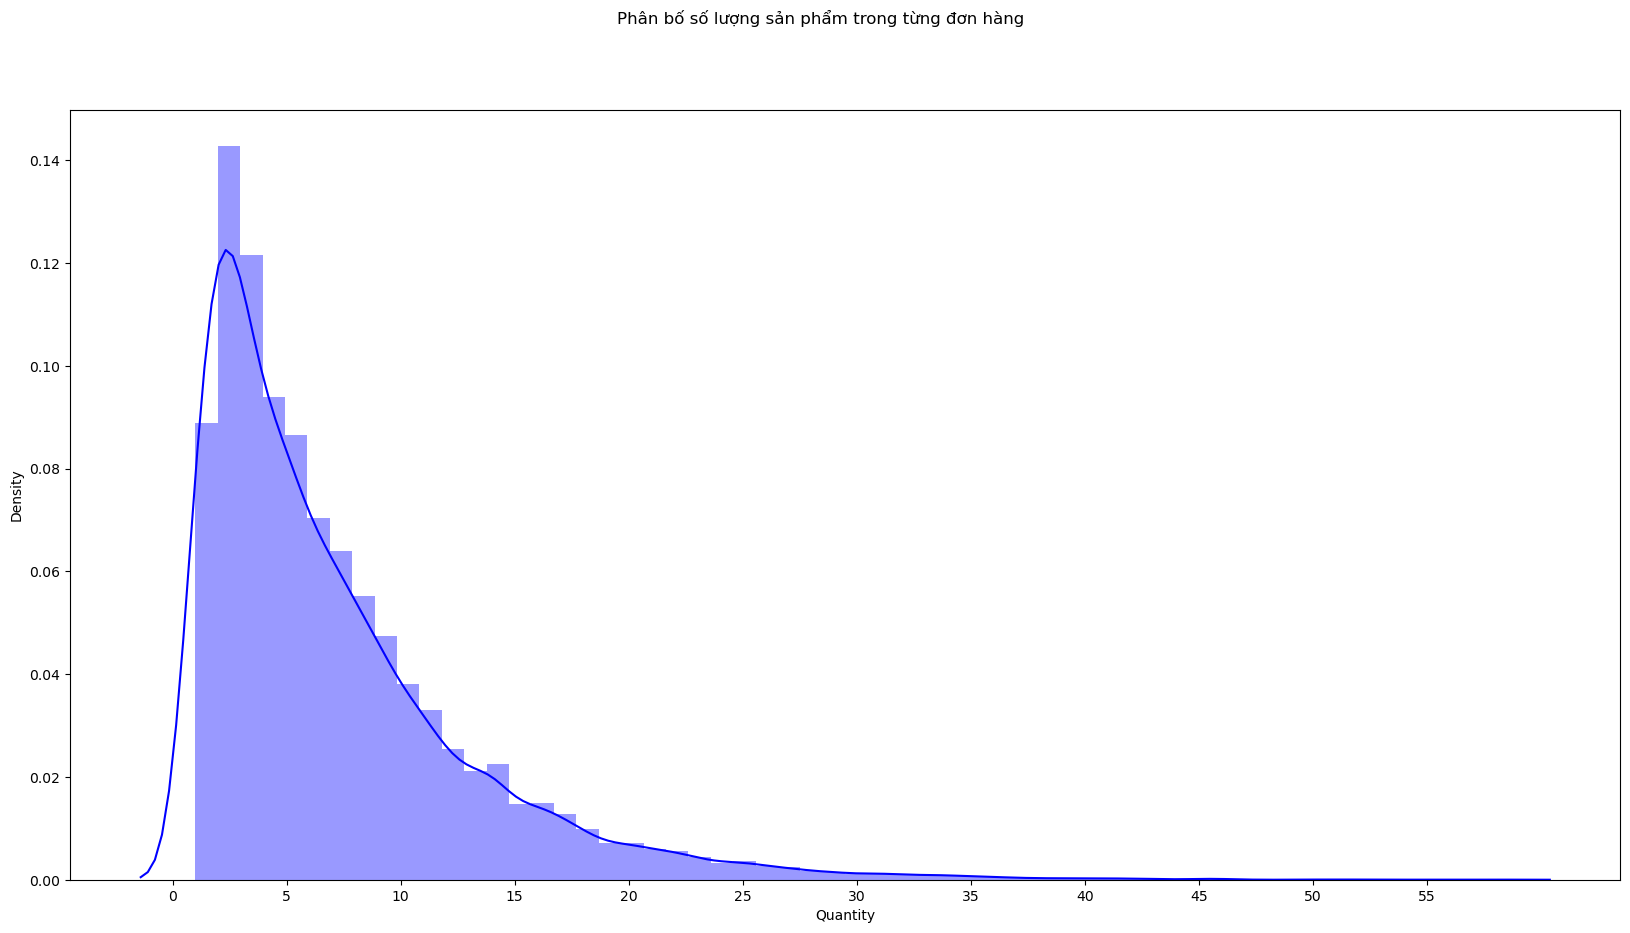

In [17]:
count = df.groupby('Order ID').sum()['Quantity']


fig2, ax2 = plt.subplots(figsize=(20,10))
fig2.suptitle('Phân bố số lượng sản phẩm trong từng đơn hàng')
ax2 = sns.distplot(count, kde = True, color = 'blue', bins = 58)
plt.xticks(range(0,60,5))
plt.show()

# Trực quan hóa

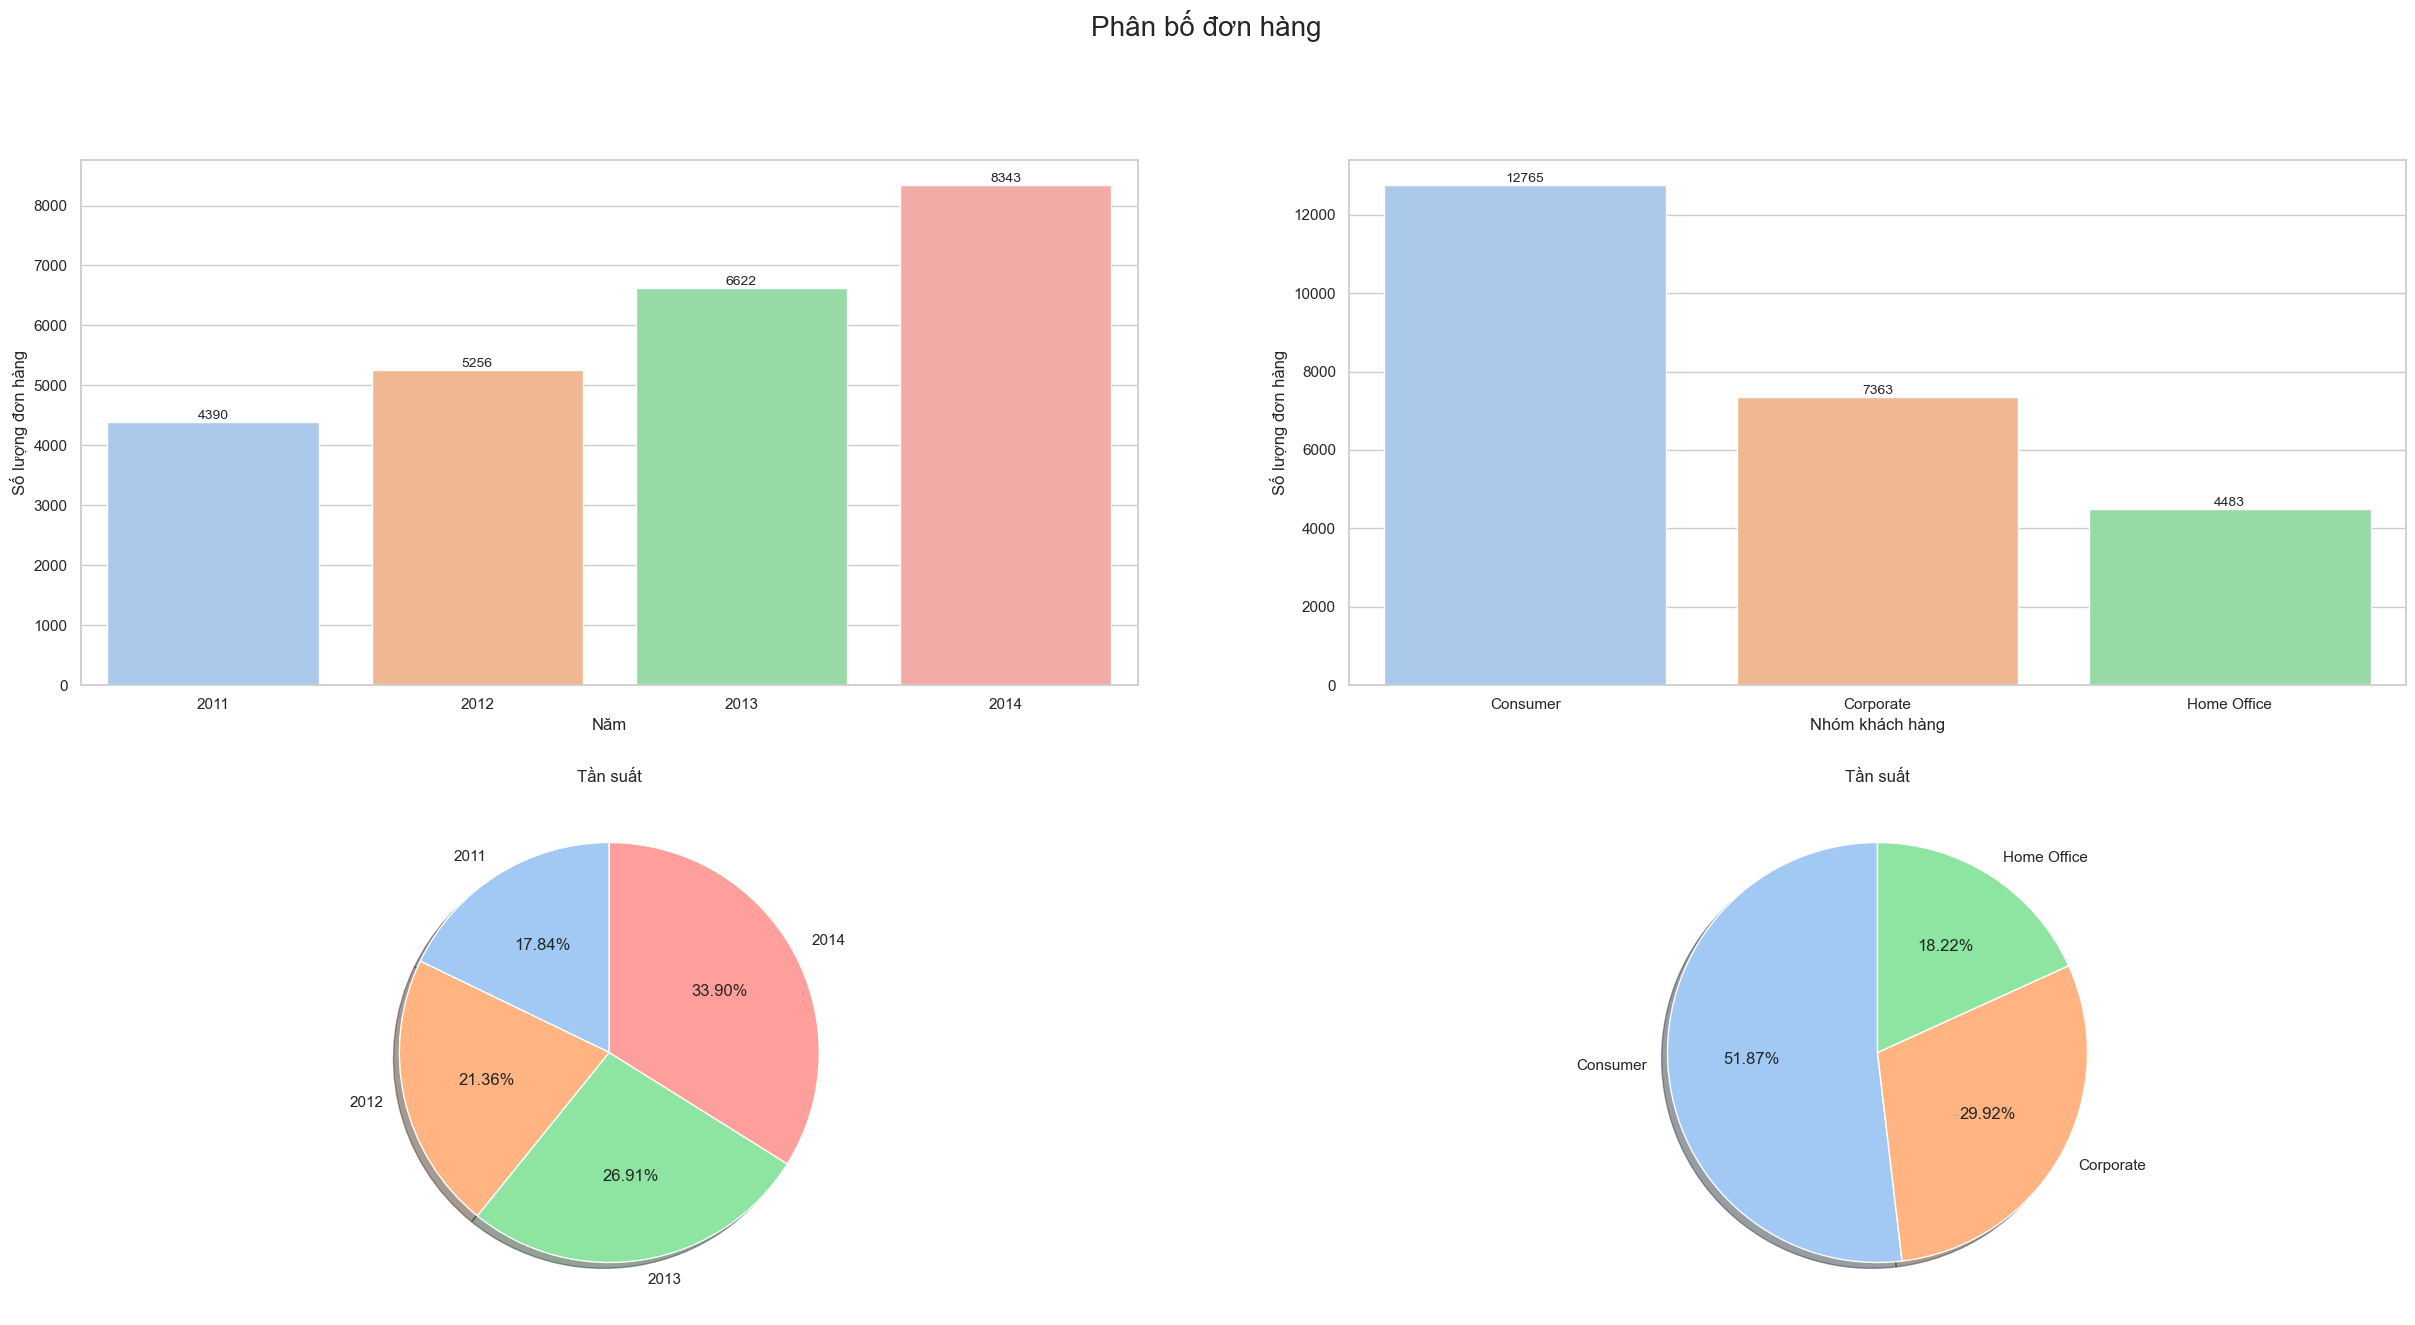

In [18]:
sns.set_theme(style="whitegrid", palette="pastel")

fig = plt.figure(figsize = (30,15))
fig.suptitle('Phân bố đơn hàng', size = 20)

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x = years, y = year_order)
for i in ax1.containers:
    ax1.bar_label(i,fontsize=10)
ax1.set_xlabel('Năm')
ax1.set_ylabel('Số lượng đơn hàng')

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x = segment, y = seg_order)
for i in ax2.containers:
    ax2.bar_label(i,fontsize=10)
ax2.set_xlabel('Nhóm khách hàng')
ax2.set_ylabel('Số lượng đơn hàng')

ax3 = fig.add_subplot(2,2,3)
ax3 = plt.pie(year_order_rate, labels = years, startangle = 90, autopct='%.2f%%', shadow = True)
plt.title('Tần suất')

ax4 = fig.add_subplot(2,2,4)
ax4 = plt.pie(seg_order_rate, labels = segment, startangle = 90, autopct='%.2f%%', shadow = True)
plt.title('Tần suất')

plt.savefig("phan_bo_don_hang", facecolor="w")
plt.show()

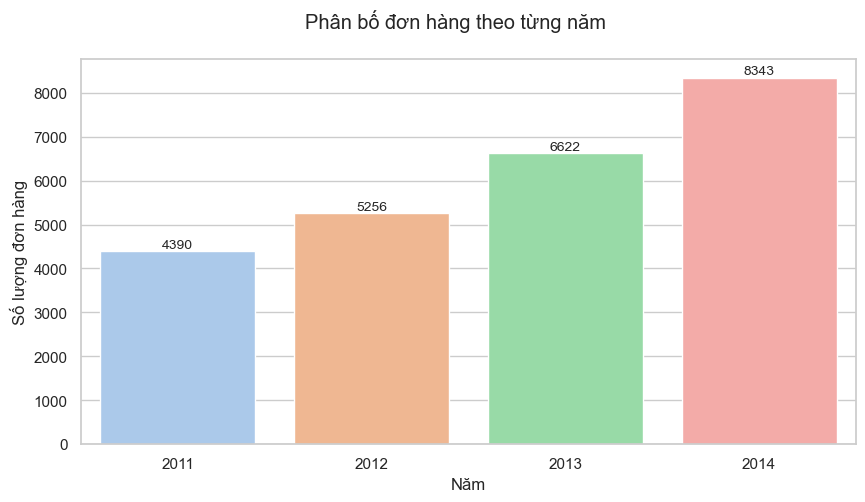

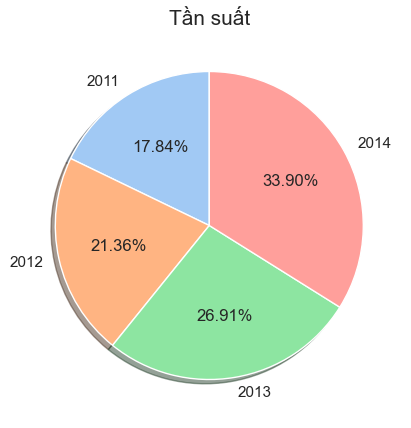

In [19]:
# Phân bố order theo từng năm

fig1, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = years, y = year_order)
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
fig1.suptitle('Phân bố đơn hàng theo từng năm')
ax.set_xlabel('Năm')
ax.set_ylabel('Số lượng đơn hàng')

ax1 = plt.subplots(figsize=(10,5))
ax1 = plt.pie(year_order_rate, labels = years, startangle = 90, autopct='%.2f%%', shadow = True)
plt.title('Tần suất', fontsize = 15)
plt.show()

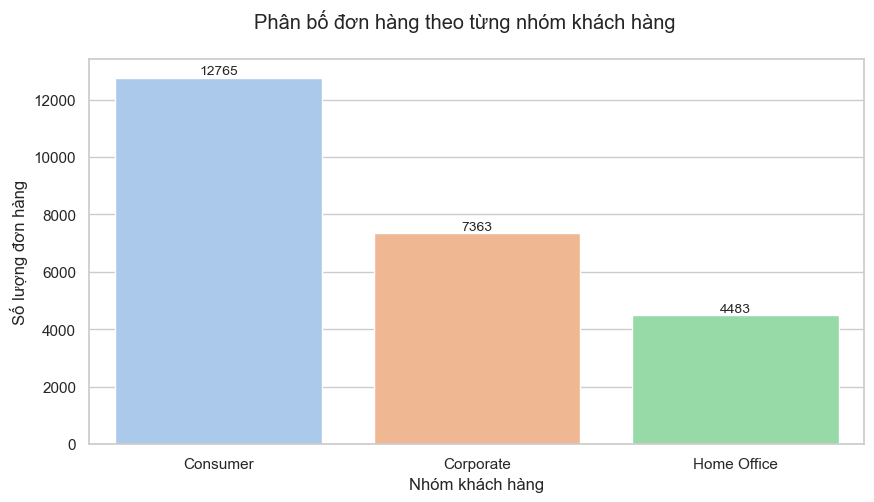

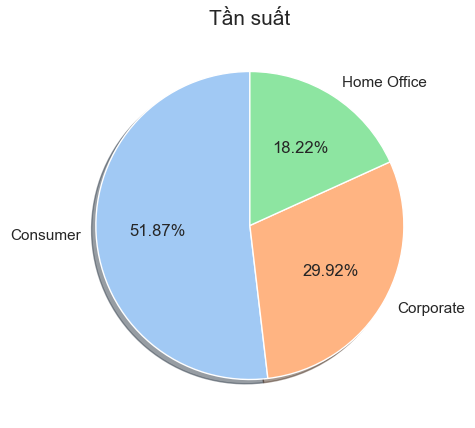

In [20]:
# Số lượng order theo từng nhóm khách hàng
# Từng nhóm khách hàng chiếm bao nhiêu %
fig1, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = segment, y = seg_order)
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
fig1.suptitle('Phân bố đơn hàng theo từng nhóm khách hàng')
ax.set_xlabel('Nhóm khách hàng')
ax.set_ylabel('Số lượng đơn hàng')

ax1 = plt.subplots(figsize=(10,5))
ax1 = plt.pie(seg_order_rate, labels = segment, startangle = 90, autopct='%.2f%%', shadow = True)
plt.title('Tần suất', fontsize = 15)
plt.show()

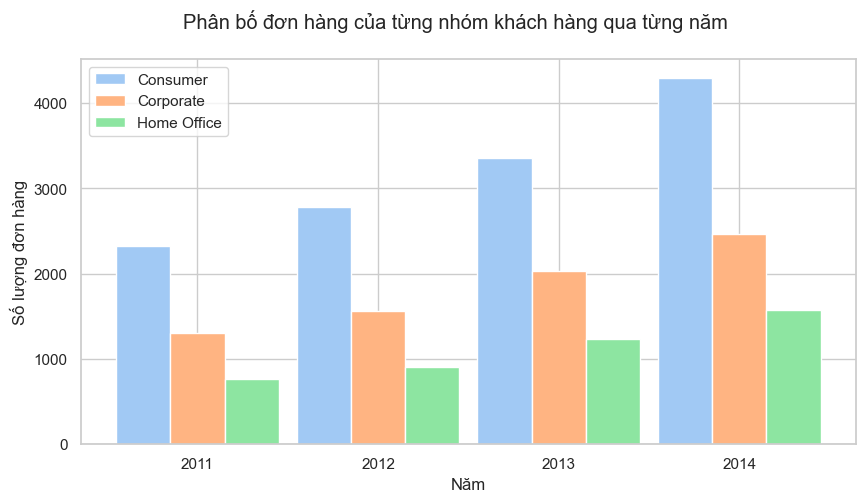

In [21]:
# Số lượng order từng nhóm khách hàng theo từng năm

data = np.array(seg_year_order).T

fig2, ax2 = plt.subplots(figsize=(10,5))
fig2.suptitle('Phân bố đơn hàng của từng nhóm khách hàng qua từng năm')
ax2.set_xlabel('Năm')
ax2.set_ylabel('Số lượng đơn hàng')
x1 = years
ax2 = plt.bar(x=[i-0.3 for i in x1], height=data[0], width=0.3,  label="Consumer")
ax2 = plt.bar(x=[i for i in x1], height=data[1], width=0.3,  label="Corporate")
ax2 = plt.bar(x=[i+0.3 for i in x1], height=data[2], width=0.3,  label="Home Office")
plt.xticks(years)
plt.legend()
plt.show()

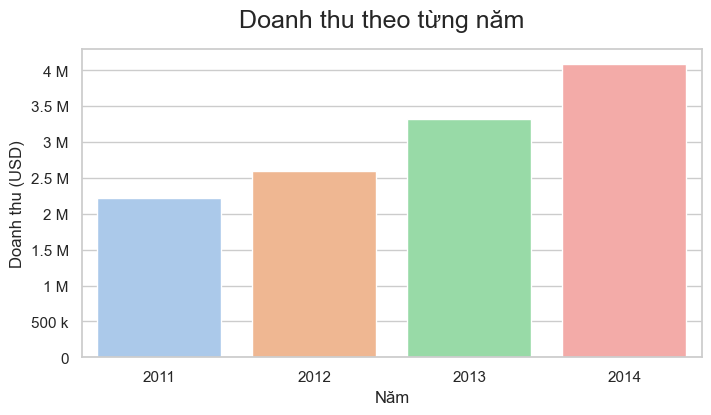

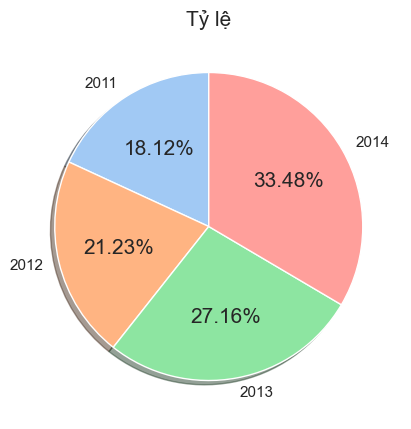

In [54]:
# Doanh thu từng năm

fig1, ax = plt.subplots(figsize=(8,4))

ax = sns.barplot(x = years, y = year_sale)
ax.yaxis.set_major_formatter(mpt.EngFormatter())
fig1.suptitle('Doanh thu theo từng năm')
ax.set_xlabel('Năm')
ax.set_ylabel('Doanh thu (USD)')

ax1 = plt.subplots(figsize=(10,5))
ax1 = plt.pie(year_sale_rate, labels = years, startangle = 90, autopct='%.2f%%', shadow = True)
plt.title('Tỷ lệ', fontsize = 15)
# plt.savefig('1.png', facecolor="w")
plt.show()

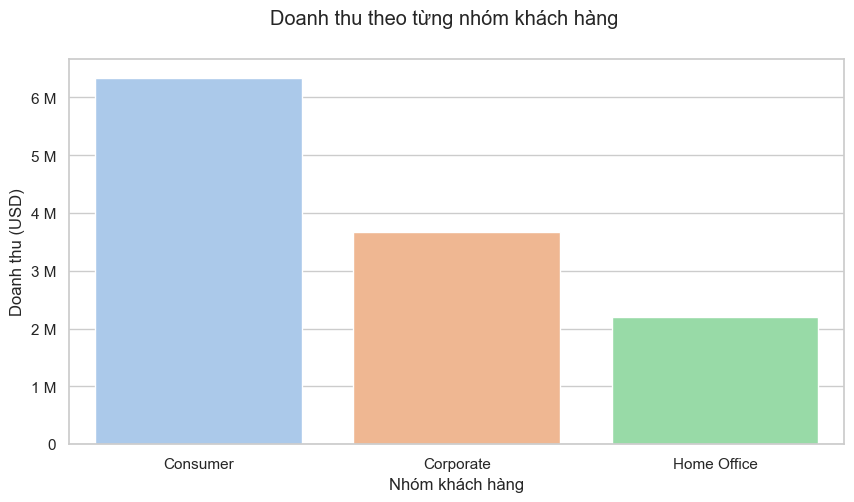

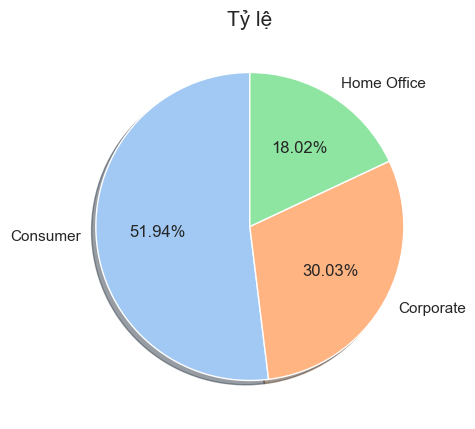

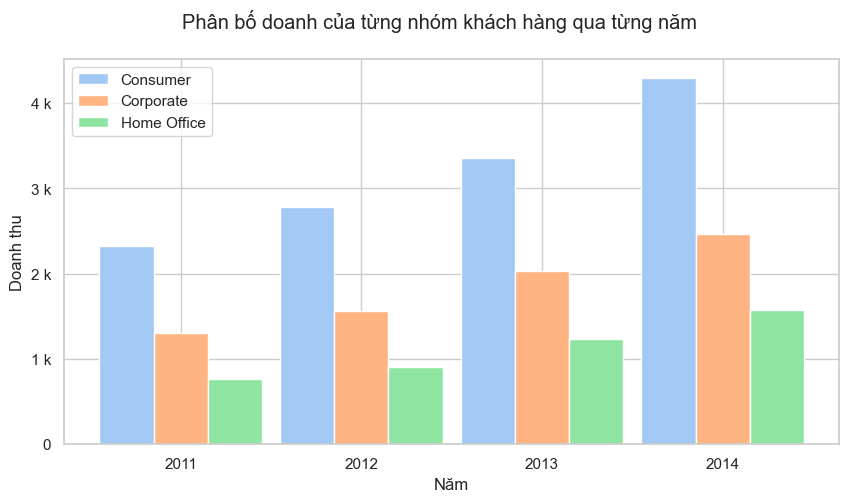

In [23]:
# Doanh thu theo từng nhóm khách hàng
fig1, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = segment, y = seg_sale)
ax.yaxis.set_major_formatter(mpt.EngFormatter())
fig1.suptitle('Doanh thu theo từng nhóm khách hàng')
ax.set_xlabel('Nhóm khách hàng')
ax.set_ylabel('Doanh thu (USD)')

ax1 = plt.subplots(figsize=(10,5))
ax1 = plt.pie(seg_sale_rate, labels = segment, startangle = 90, autopct='%.2f%%', shadow = True)
plt.title('Tỷ lệ', fontsize = 15)
# plt.savefig('1.png', facecolor="w")
plt.show()

fig2, ax2 = plt.subplots(figsize=(10,5))
ax2.yaxis.set_major_formatter(mpt.EngFormatter())
fig2.suptitle('Phân bố doanh của từng nhóm khách hàng qua từng năm')
ax2.set_xlabel('Năm')
ax2.set_ylabel('Doanh thu')
x1 = years
ax2 = plt.bar(x=[i-0.3 for i in x1], height=data[0], width=0.3,  label="Consumer")
ax2 = plt.bar(x=[i for i in x1], height=data[1], width=0.3,  label="Corporate")
ax2 = plt.bar(x=[i+0.3 for i in x1], height=data[2], width=0.3,  label="Home Office")
plt.xticks(years)
plt.legend()
plt.show()

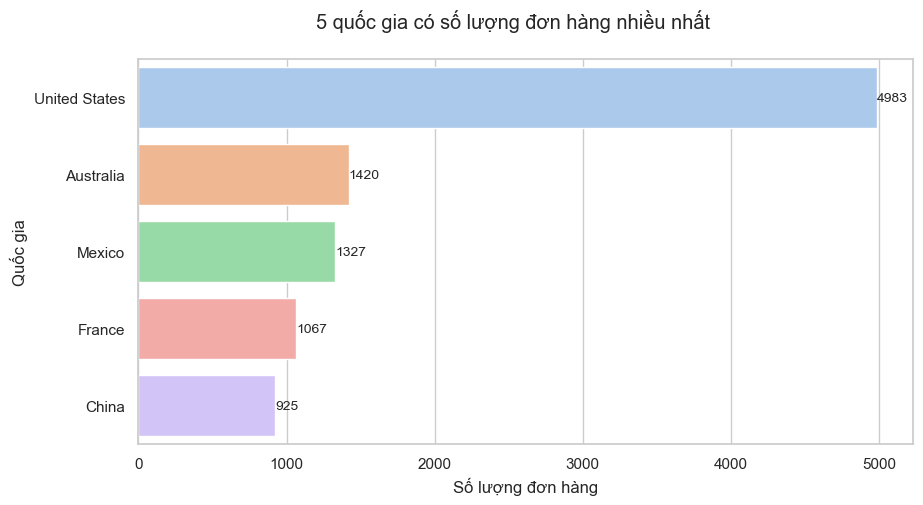

In [24]:
# 5 quốc gia có số lượng order nhiều nhất

sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = country_5_value, y = country_5)
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
fig.suptitle('5 quốc gia có số lượng đơn hàng nhiều nhất')
ax.set_ylabel('Quốc gia')
ax.set_xlabel('Số lượng đơn hàng')
plt.show()

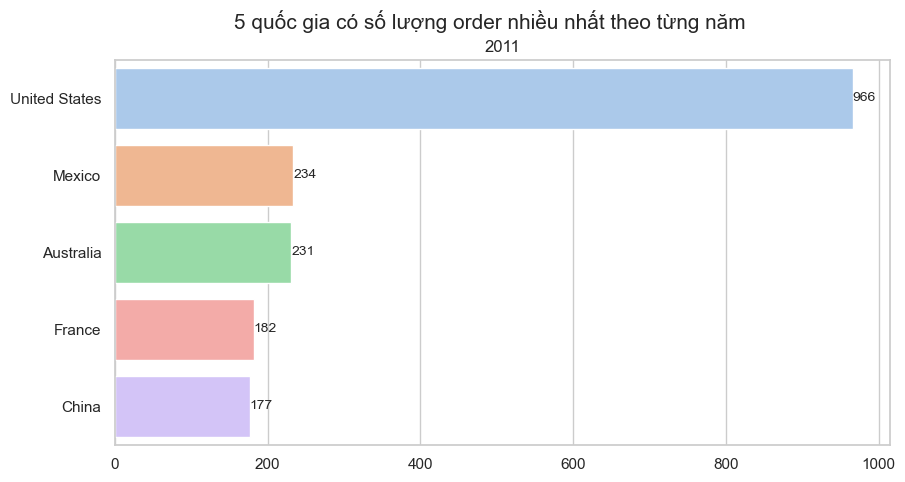

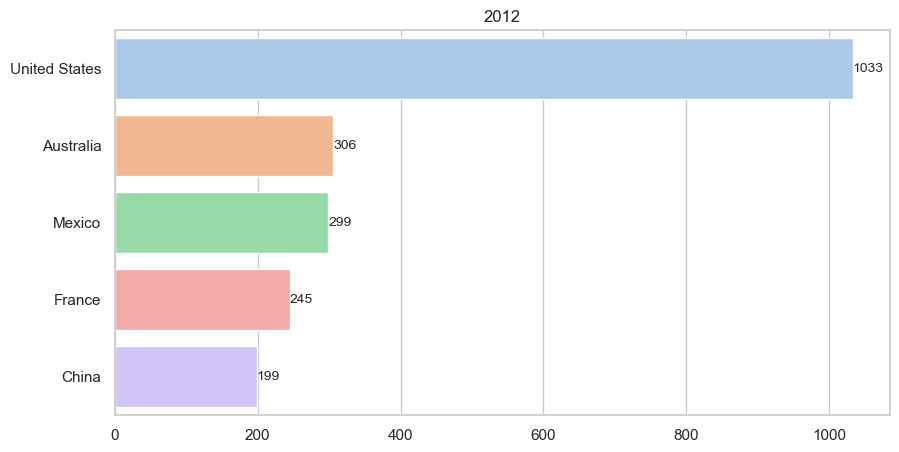

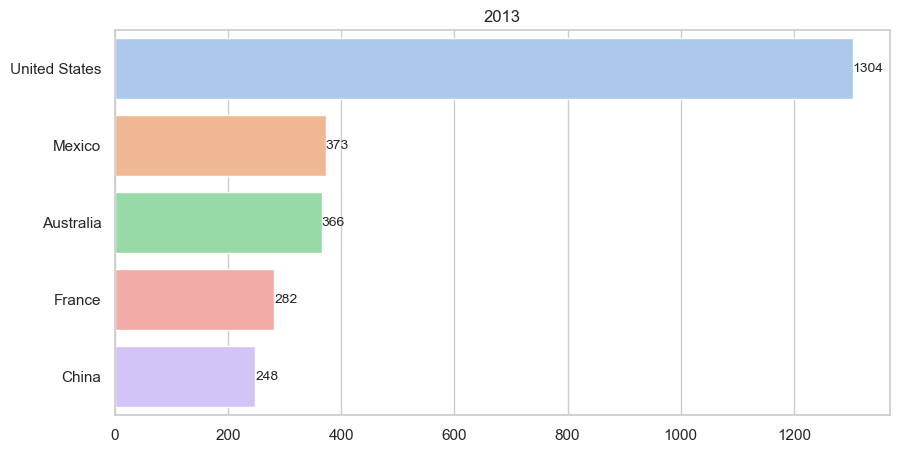

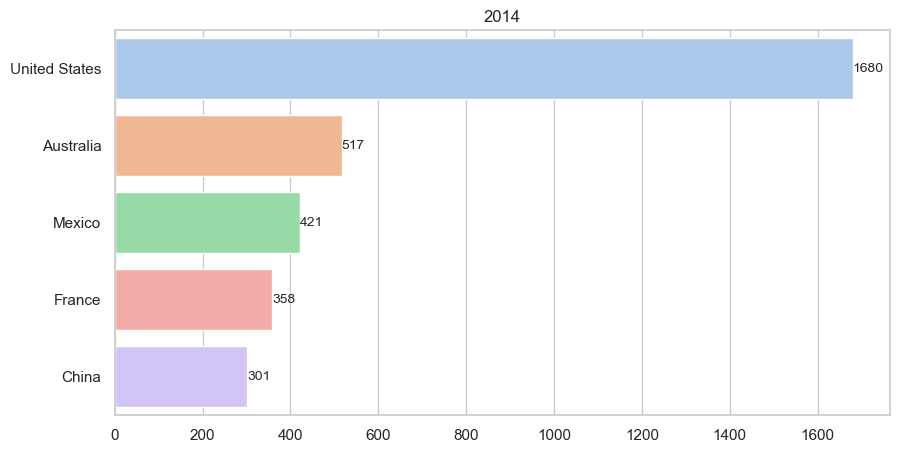

In [25]:
# 5 quốc gia có số lượng order nhiều nhất theo từng năm
fig1 = plt.figure(figsize = (10,5))
plt.suptitle('5 quốc gia có số lượng order nhiều nhất theo từng năm', size = 15)
ax1 = sns.barplot(x = country_5_year_value[0], y = country_5_year[0])
for i in ax1.containers:
    ax1.bar_label(i,fontsize=10)
plt.title('2011')
plt.savefig('1.png')

fig2 = plt.figure(figsize = (10,5))
ax2 = sns.barplot(x = country_5_year_value[1], y = country_5_year[1])
for i in ax2.containers:
    ax2.bar_label(i,fontsize=10)
plt.title('2012')

fig3 = plt.figure(figsize = (10,5))
ax3 = sns.barplot(x = country_5_year_value[2], y = country_5_year[2])
for i in ax3.containers:
    ax3.bar_label(i,fontsize=10)
plt.title('2013')

fig4 = plt.figure(figsize = (10,5))
ax4 = sns.barplot(x = country_5_year_value[3], y = country_5_year[3])
for i in ax4.containers:
    ax4.bar_label(i,fontsize=10)
plt.title('2014')
plt.show()

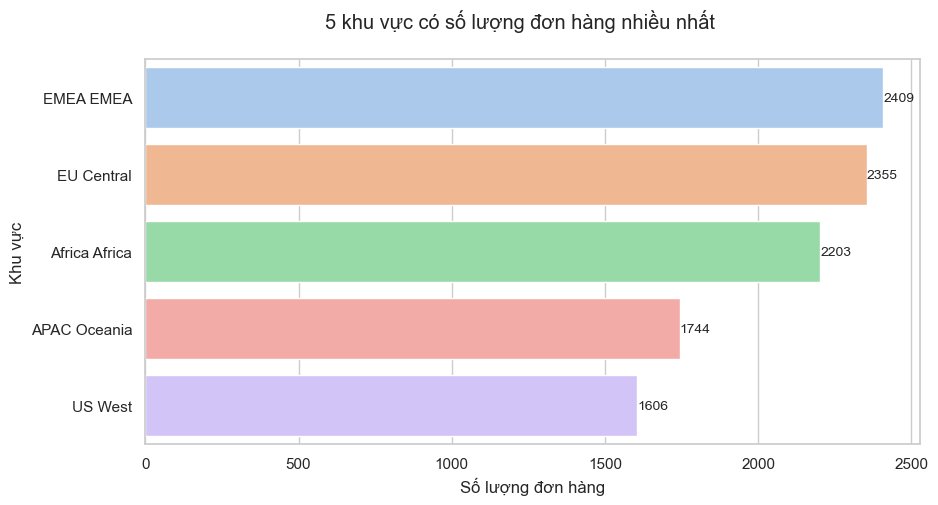

In [26]:
# 5 khu vực có số lượng order nhiều nhất

sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = area_5_value, y = area_5)
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
fig.suptitle('5 khu vực có số lượng đơn hàng nhiều nhất')
ax.set_ylabel('Khu vực')
ax.set_xlabel('Số lượng đơn hàng')
plt.show()

Text(0.5, 1.0, '2014')

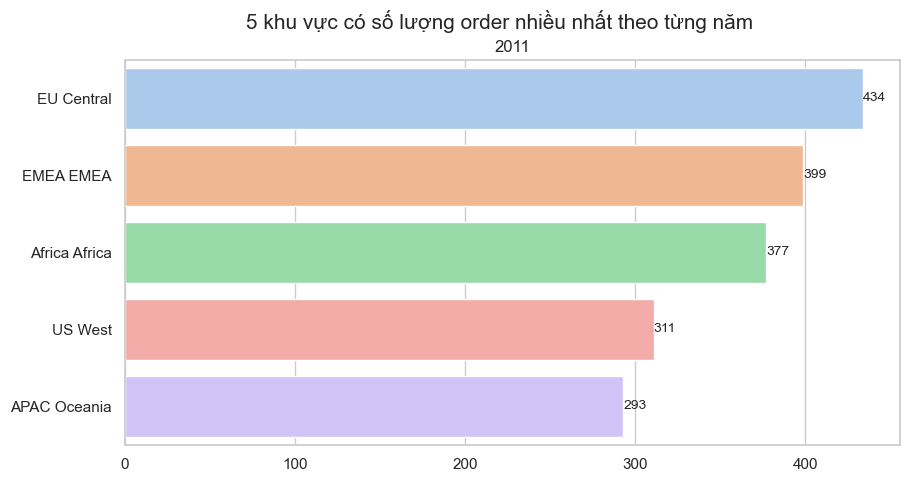

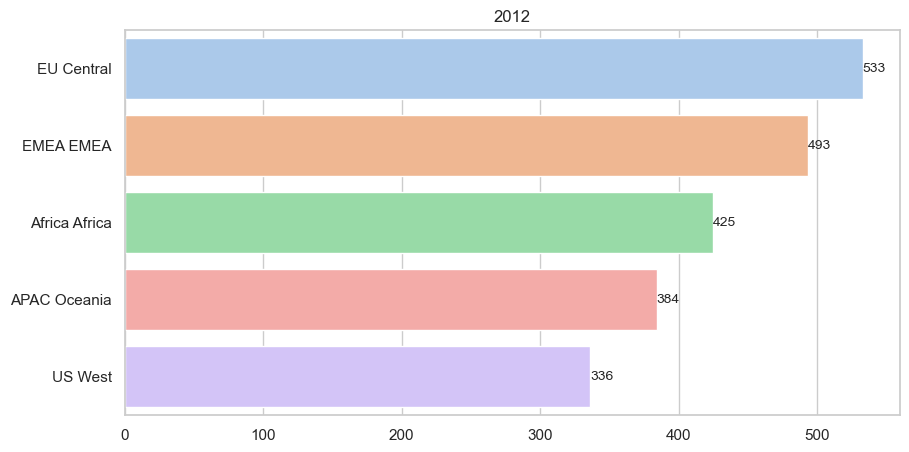

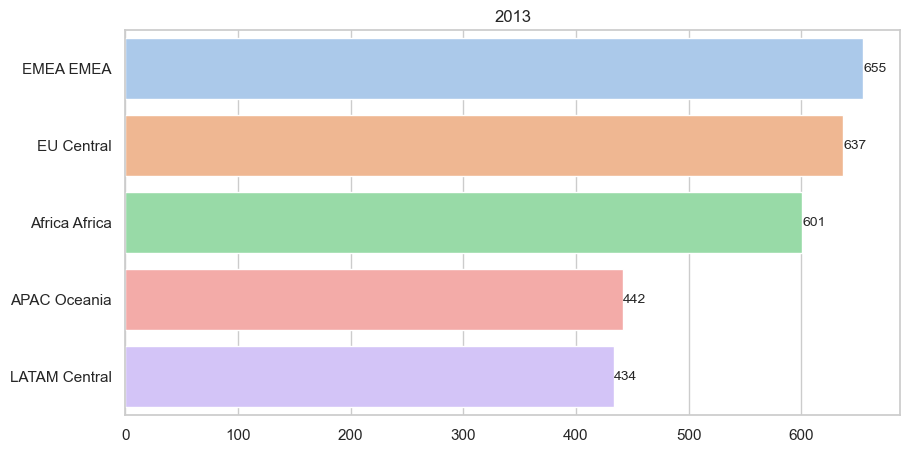

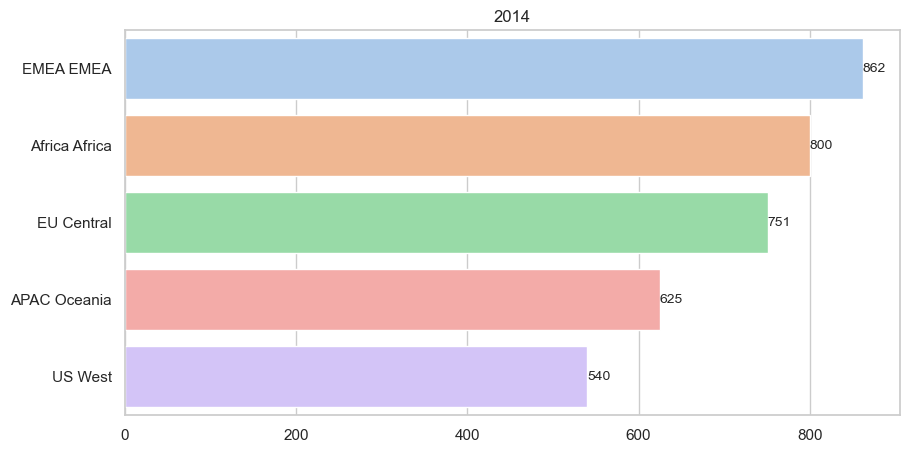

In [27]:
# 5 khu vực có số lượng order nhiều nhất theo từng năm
fig1 = plt.figure(figsize = (10,5))
plt.suptitle('5 khu vực có số lượng order nhiều nhất theo từng năm', size = 15)
ax1 = sns.barplot(x = area_5_year_value[0], y = area_5_year[0])
for i in ax1.containers:
    ax1.bar_label(i,fontsize=10)
plt.title('2011')
plt.savefig('1.png')

fig2 = plt.figure(figsize = (10,5))
ax2 = sns.barplot(x = area_5_year_value[1], y = area_5_year[1])
for i in ax2.containers:
    ax2.bar_label(i,fontsize=10)
plt.title('2012')

fig3 = plt.figure(figsize = (10,5))
ax3 = sns.barplot(x = area_5_year_value[2], y = area_5_year[2])
for i in ax3.containers:
    ax3.bar_label(i,fontsize=10)
plt.title('2013')

fig4 = plt.figure(figsize = (10,5))
ax4 = sns.barplot(x = area_5_year_value[3], y = area_5_year[3])
for i in ax4.containers:
    ax4.bar_label(i,fontsize=10)
plt.title('2014')

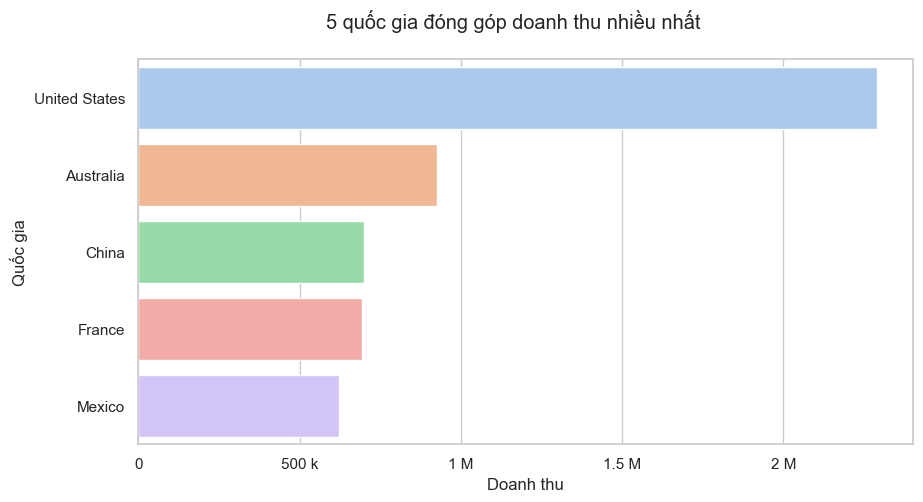

In [28]:
sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = country_5_sale_value, y = country_5_sale)
ax.xaxis.set_major_formatter(mpt.EngFormatter())
fig.suptitle('5 quốc gia đóng góp doanh thu nhiều nhất')
ax.set_ylabel('Quốc gia')
ax.set_xlabel('Doanh thu')
plt.show()

Text(0.5, 1.0, '2014')

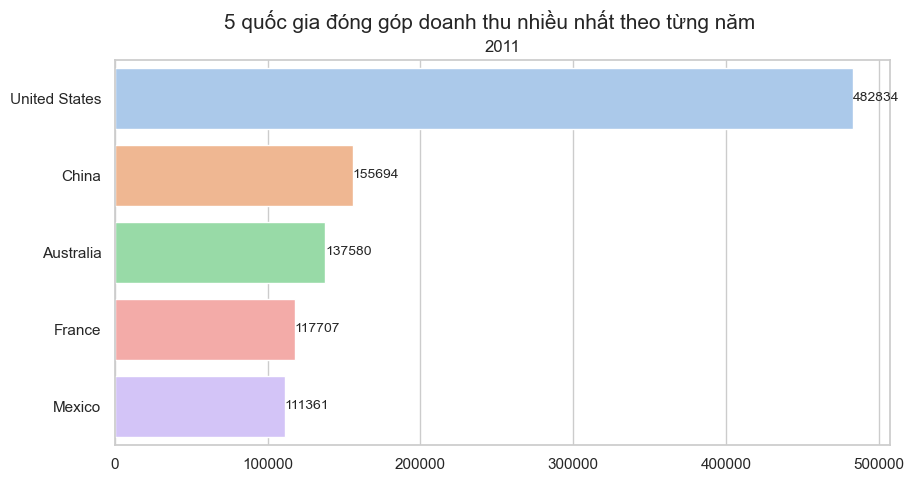

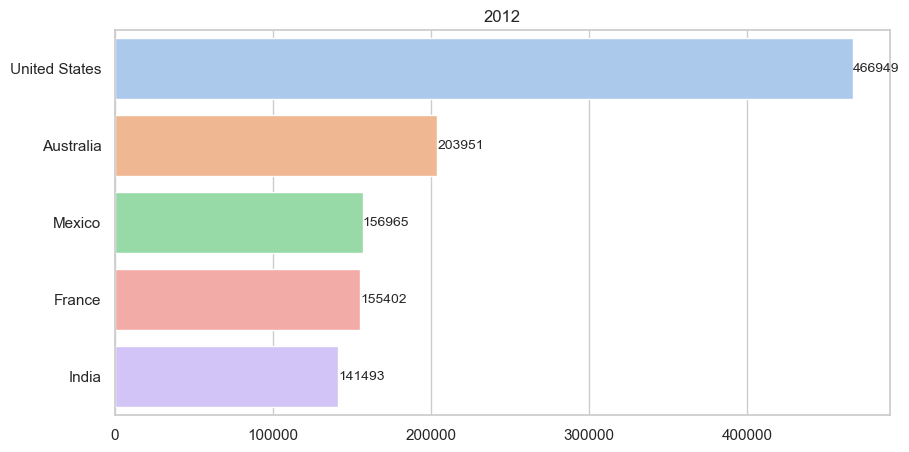

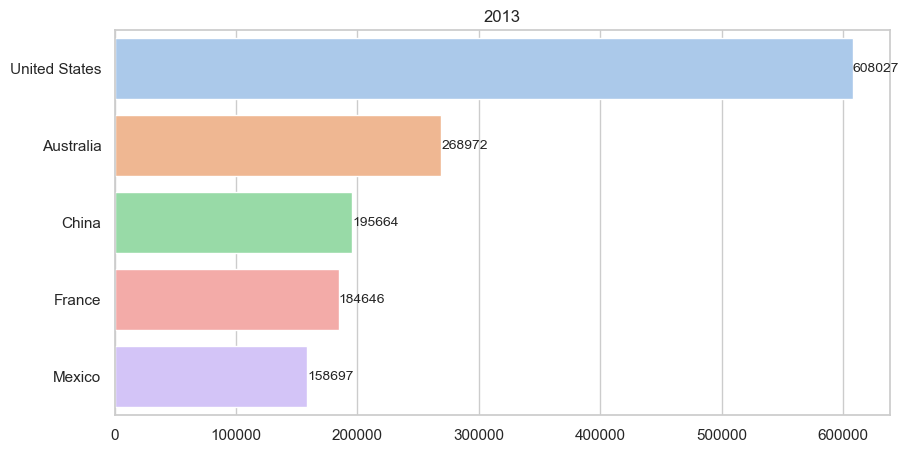

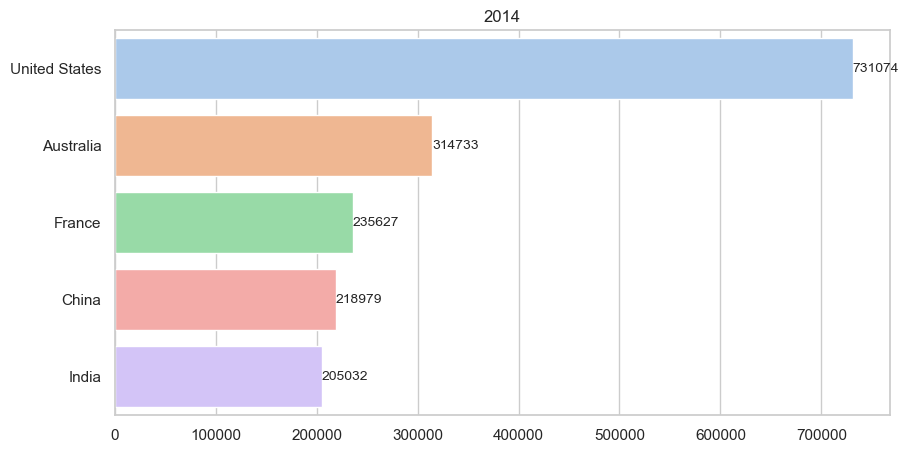

In [29]:
# 5 quốc gia có doanh thu nhiều nhất theo từng năm
fig1 = plt.figure(figsize = (10,5))
plt.suptitle('5 quốc gia đóng góp doanh thu nhiều nhất theo từng năm', size = 15)
ax1 = sns.barplot(x = country_5_year_sale_value[0], y = country_5_year_sale[0])
for i in ax1.containers:
    ax1.bar_label(i,fontsize=10)
plt.title('2011')
plt.savefig('1.png')

fig2 = plt.figure(figsize = (10,5))
ax2 = sns.barplot(x = country_5_year_sale_value[1], y = country_5_year_sale[1])
for i in ax2.containers:
    ax2.bar_label(i,fontsize=10)
plt.title('2012')

fig3 = plt.figure(figsize = (10,5))
ax3 = sns.barplot(x = country_5_year_sale_value[2], y = country_5_year_sale[2])
for i in ax3.containers:
    ax3.bar_label(i,fontsize=10)
plt.title('2013')

fig4 = plt.figure(figsize = (10,5))
ax4 = sns.barplot(x = country_5_year_sale_value[3], y = country_5_year_sale[3])
for i in ax4.containers:
    ax4.bar_label(i,fontsize=10)
plt.title('2014')

Text(0.5, 1.0, '2014')

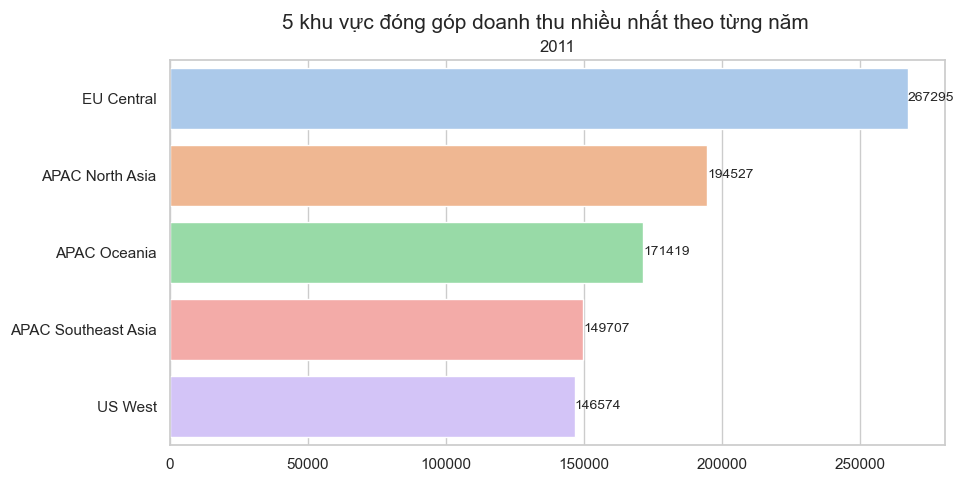

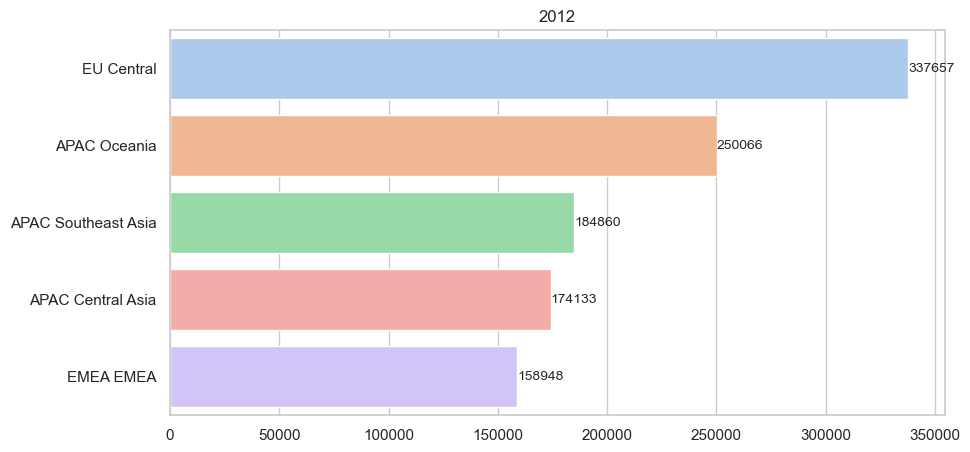

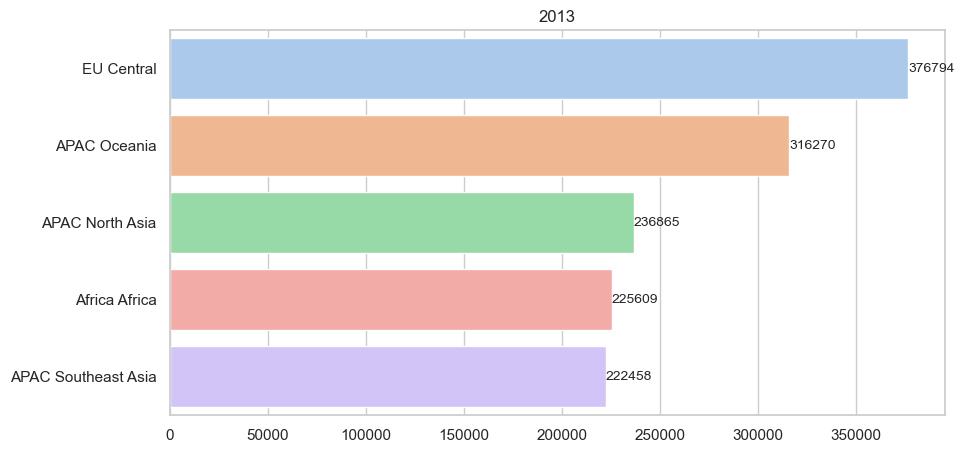

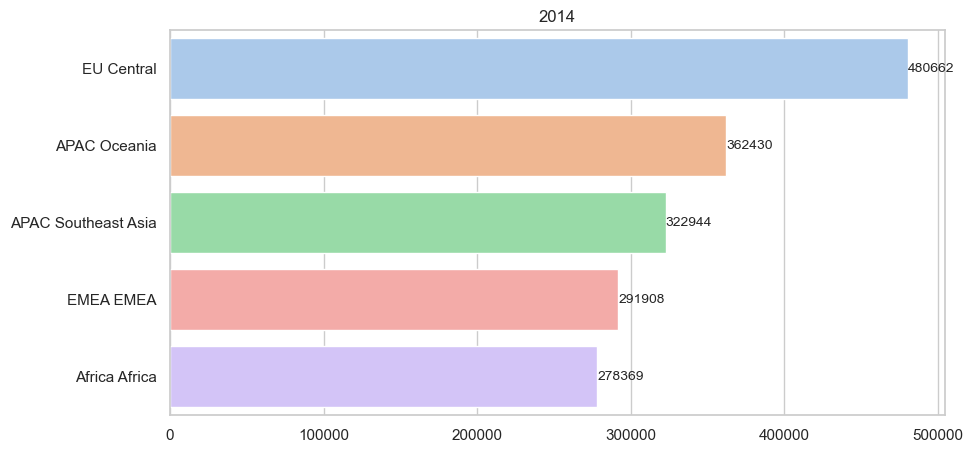

In [30]:
# 5 khu vực có doanh thu nhiều nhất theo từng năm
fig1 = plt.figure(figsize = (10,5))
plt.suptitle('5 khu vực đóng góp doanh thu nhiều nhất theo từng năm', size = 15)
ax1 = sns.barplot(x = area_5_year_sale_value[0], y = area_5_year_sale[0])
for i in ax1.containers:
    ax1.bar_label(i,fontsize=10)
plt.title('2011')

fig2 = plt.figure(figsize = (10,5))
ax2 = sns.barplot(x = area_5_year_sale_value[1], y = area_5_year_sale[1])
for i in ax2.containers:
    ax2.bar_label(i,fontsize=10)
plt.title('2012')

fig3 = plt.figure(figsize = (10,5))
ax3 = sns.barplot(x = area_5_year_sale_value[2], y = area_5_year_sale[2])
for i in ax3.containers:
    ax3.bar_label(i,fontsize=10)
plt.title('2013')

fig4 = plt.figure(figsize = (10,5))
ax4 = sns.barplot(x = area_5_year_sale_value[3], y = area_5_year_sale[3])
for i in ax4.containers:
    ax4.bar_label(i,fontsize=10)
plt.title('2014')

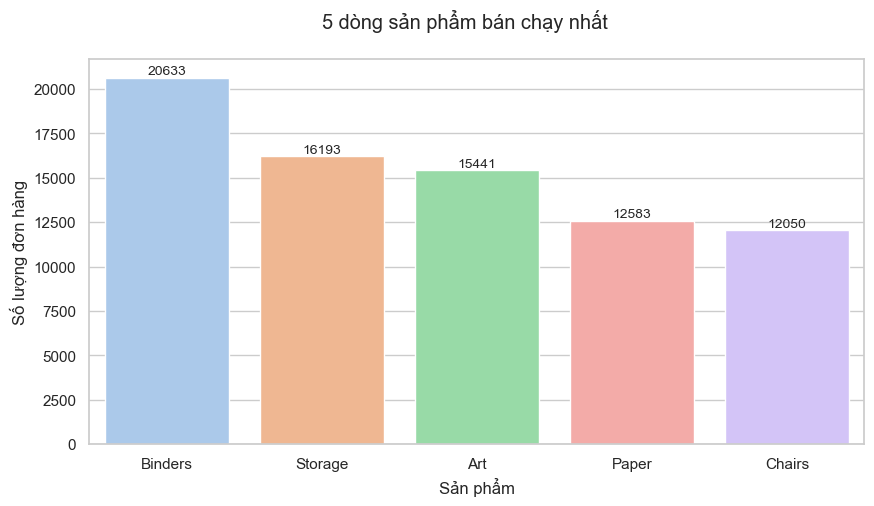

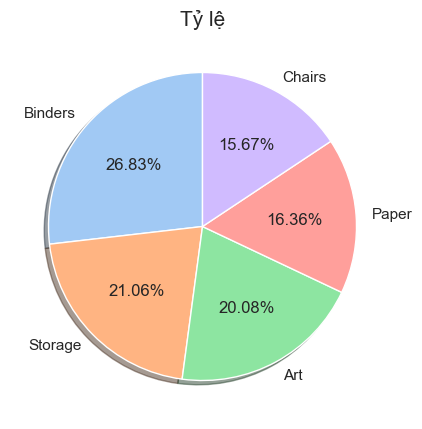

In [31]:
# 5 dòng sản phẩm bán chạy nhất

fig1, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = product_order, y = product_order_value)
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
fig1.suptitle('5 dòng sản phẩm bán chạy nhất')
ax.set_xlabel('Sản phẩm')
ax.set_ylabel('Số lượng đơn hàng')

ax1 = plt.subplots(figsize=(10,5))
ax1 = plt.pie(product_order_rate, labels = product_order, startangle = 90, autopct='%.2f%%', shadow = True)
plt.title('Tỷ lệ', fontsize = 15)
# plt.savefig('1.png', facecolor="w")
plt.show()

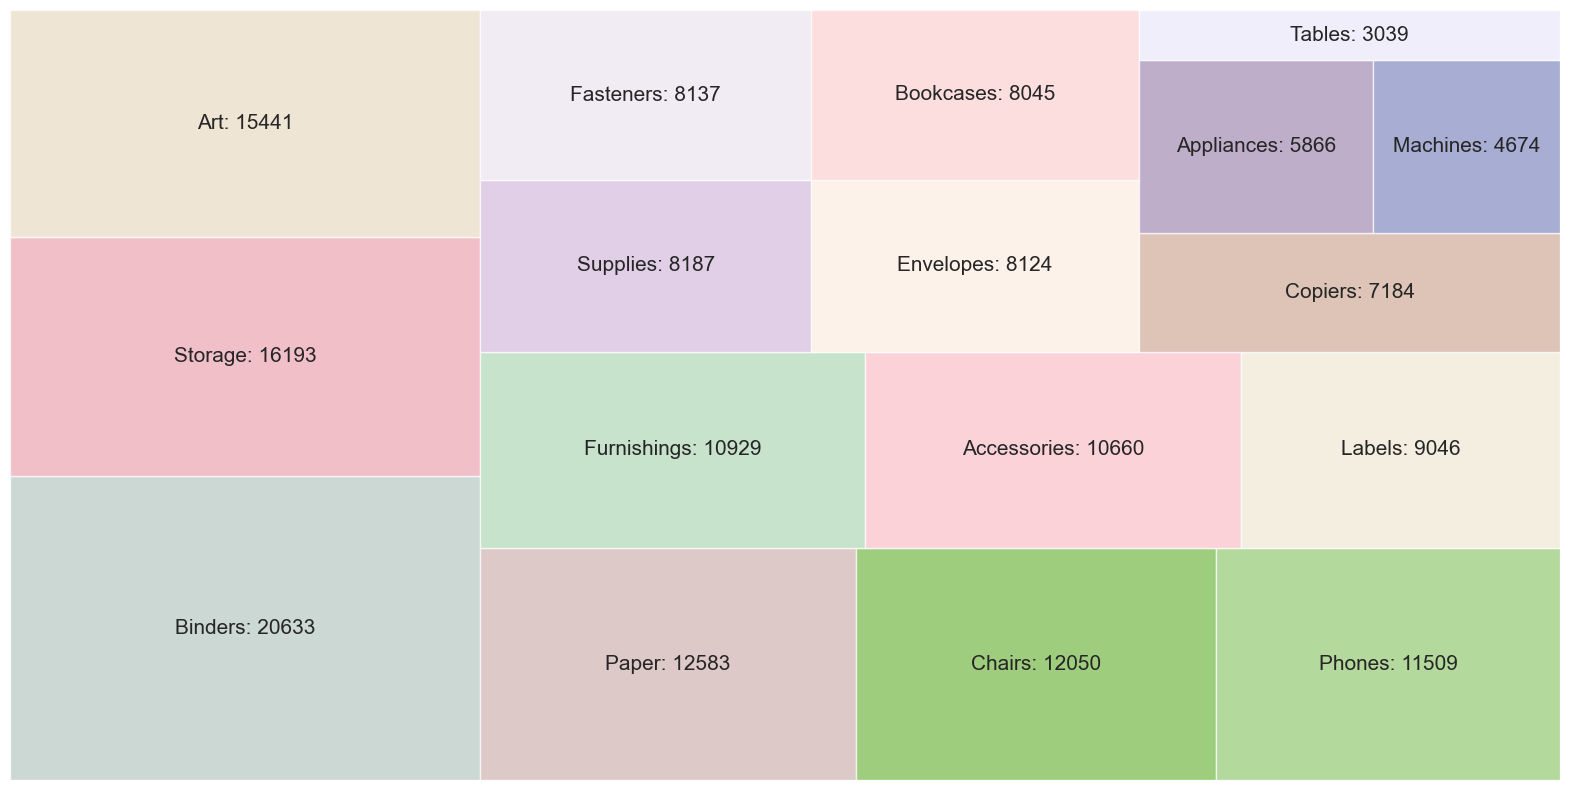

In [58]:
#Số lượng order của các dòng sản phẩm
product = np.unique(df['Sub-Category'])

product_order, product_order_value, = [], []

for i in product:
    product_order_value.append(round(np.sum(df['Quantity'][df['Sub-Category'] == i]),2))

index = np.lexsort([product, product_order_value])[::-1]

product_order = product[index]
product_order_value = np.array(product_order_value)[index]

import squarify
color1=['#B7C8C2','#ECA4B1','#E9DAC4','#CFB2B0','#76B947','#94C973','#B1D8B7','#F8C0C8','#EFE7D3','#D3BBDD','#ECE3F0','#FBEDE0','#FDD1D2','#D0AB99','#A58CB3','#838BC2','#EAE7FA']
sns.set_theme(style="whitegrid", palette='pastel')
label = []
for i in range(len(product_order_value)):
    label.append(str(product_order[i]) + ': ' + str(product_order_value[i]))
plt.rc('font', size=15)

fig = plt.figure(figsize=(20,10))

squarify.plot(sizes= product_order_value, color=color1, label = label, alpha=0.7)

plt.axis("off")
plt.show()
# print(len(product_order_value1))

Text(0.5, 1.0, '2014')

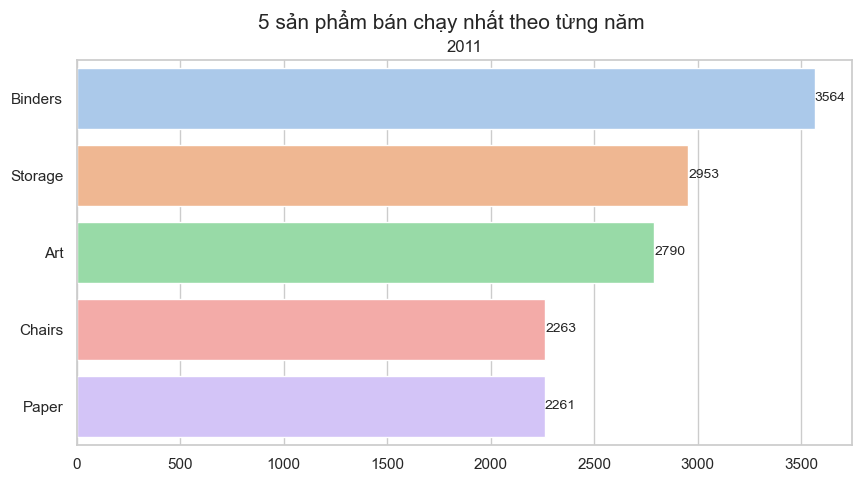

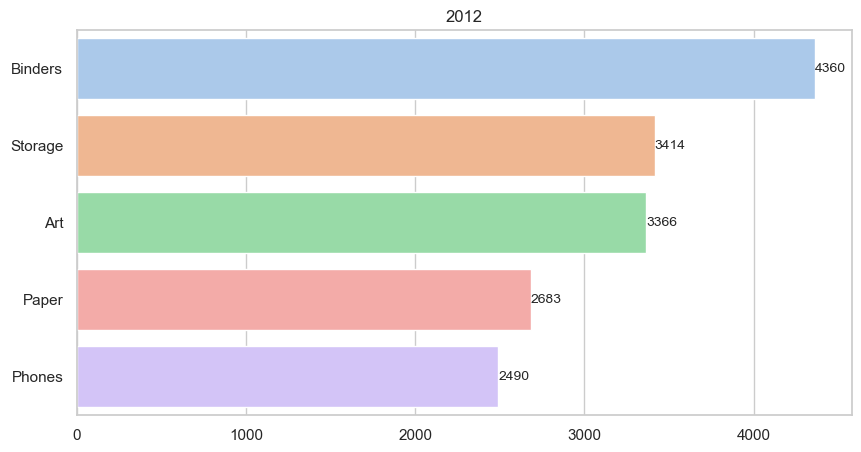

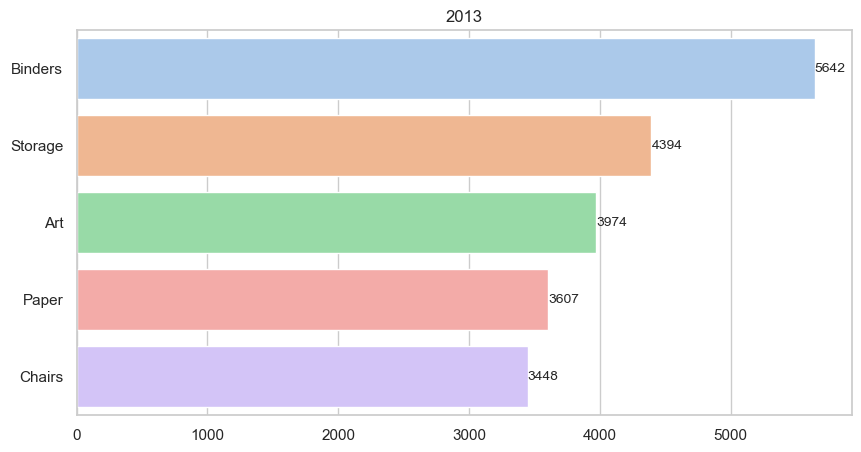

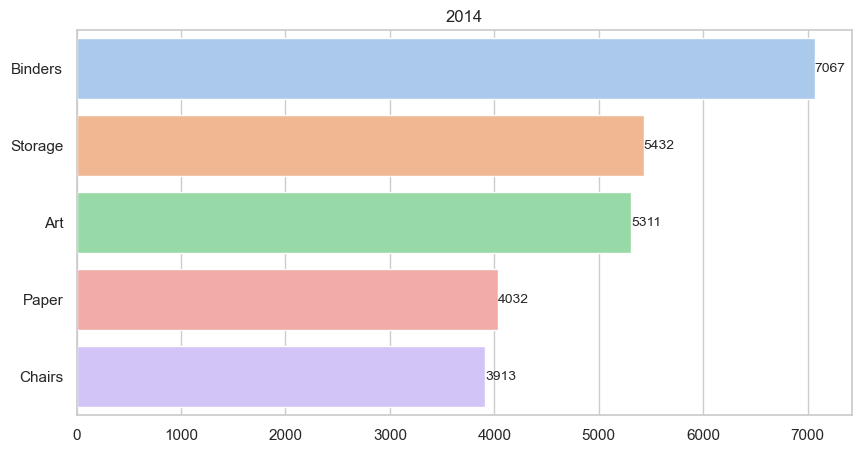

In [33]:
# 5 sản phẩm bán chạy nhất theo từng năm
fig1 = plt.figure(figsize = (10,5))
plt.suptitle('5 sản phẩm bán chạy nhất theo từng năm', size = 15)
ax1 = sns.barplot(x = product_5_year_sale_value[0], y = product_5_year_sale[0])
for i in ax1.containers:
    ax1.bar_label(i,fontsize=10)
plt.title('2011')
plt.savefig('1.png')

fig2 = plt.figure(figsize = (10,5))
ax2 = sns.barplot(x = product_5_year_sale_value[1], y = product_5_year_sale[1])
for i in ax2.containers:
    ax2.bar_label(i,fontsize=10)
plt.title('2012')

fig3 = plt.figure(figsize = (10,5))
ax3 = sns.barplot(x = product_5_year_sale_value[2], y = product_5_year_sale[2])
for i in ax3.containers:
    ax3.bar_label(i,fontsize=10)
plt.title('2013')

fig4 = plt.figure(figsize = (10,5))
ax4 = sns.barplot(x = product_5_year_sale_value[3], y = product_5_year_sale[3])
for i in ax4.containers:
    ax4.bar_label(i,fontsize=10)
plt.title('2014')

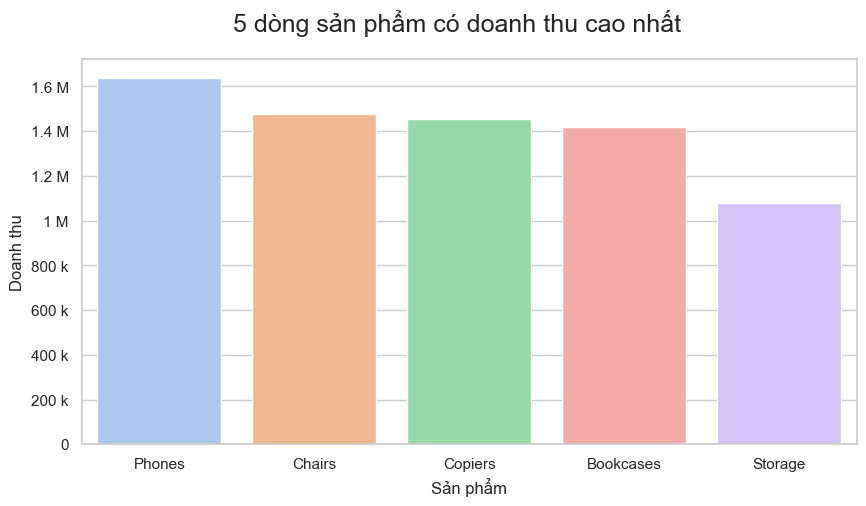

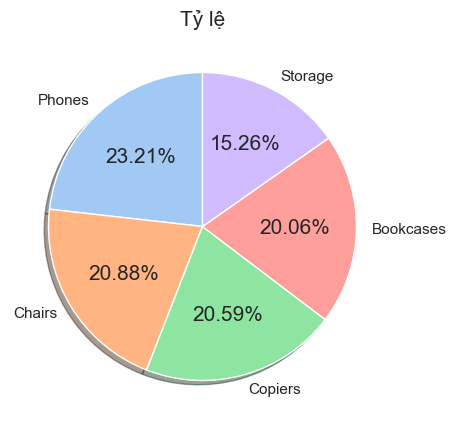

In [34]:
# 5 dòng sản phẩm có doanh thu nhất

fig1, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = product_sale, y = product_sale_value)
ax.yaxis.set_major_formatter(mpt.EngFormatter())
fig1.suptitle('5 dòng sản phẩm có doanh thu cao nhất')
ax.set_xlabel('Sản phẩm')
ax.set_ylabel('Doanh thu')

ax1 = plt.subplots(figsize=(10,5))
ax1 = plt.pie(product_sale_rate, labels = product_sale, startangle = 90, autopct='%.2f%%', shadow = True)
plt.title('Tỷ lệ', fontsize = 15)
# plt.savefig('1.png', facecolor="w")
plt.show()

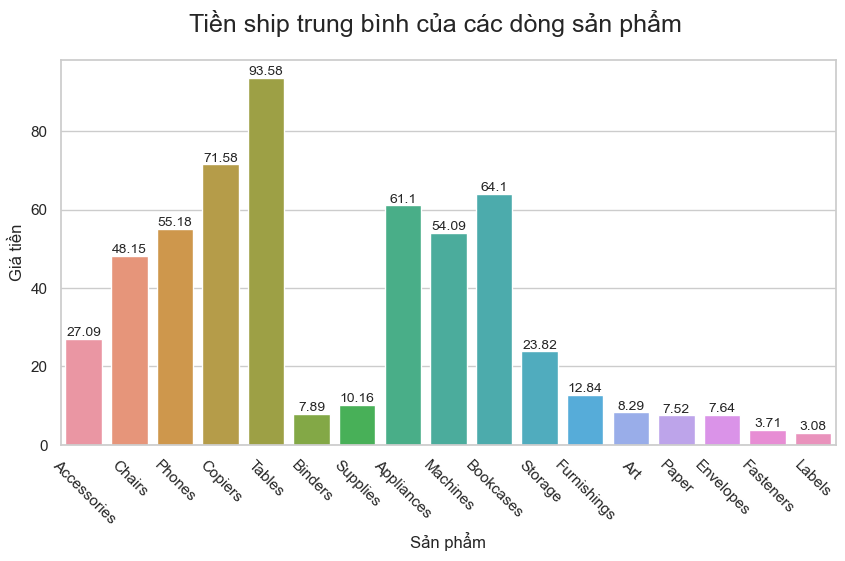

In [57]:
# Tiền ship trung bình của các dòng sản phẩm

fig1, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = product, y = ship_cost)
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
fig1.suptitle('Tiền ship trung bình của các dòng sản phẩm')
ax.set_xlabel('Sản phẩm')
ax.set_ylabel('Giá tiền')
plt.xticks(rotation = -45)

plt.show()

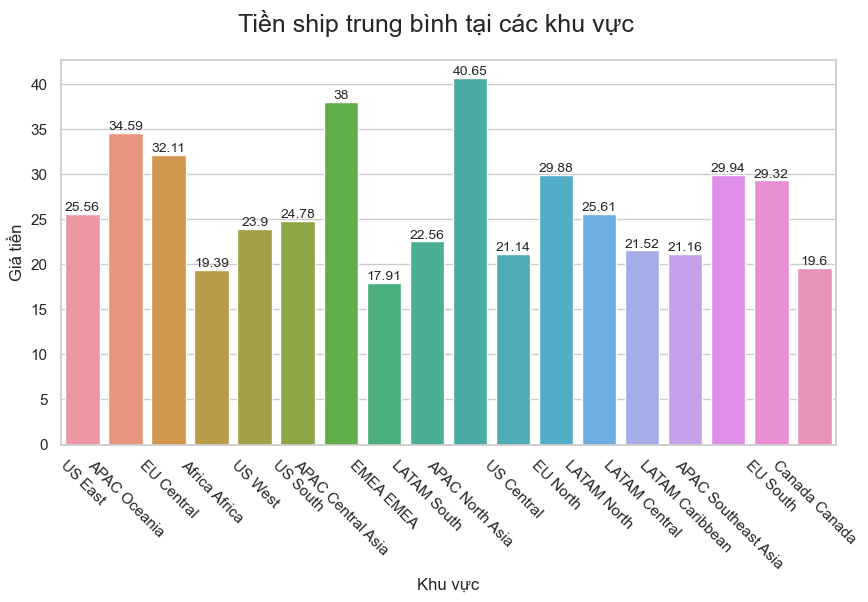

In [36]:
# Tiền ship trung bình của các khu vực

fig1, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = area, y = area_ship_cost)
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
fig1.suptitle('Tiền ship trung bình tại các khu vực')
ax.set_xlabel('Khu vực')
ax.set_ylabel('Giá tiền')
plt.xticks(rotation = -45)

plt.show()

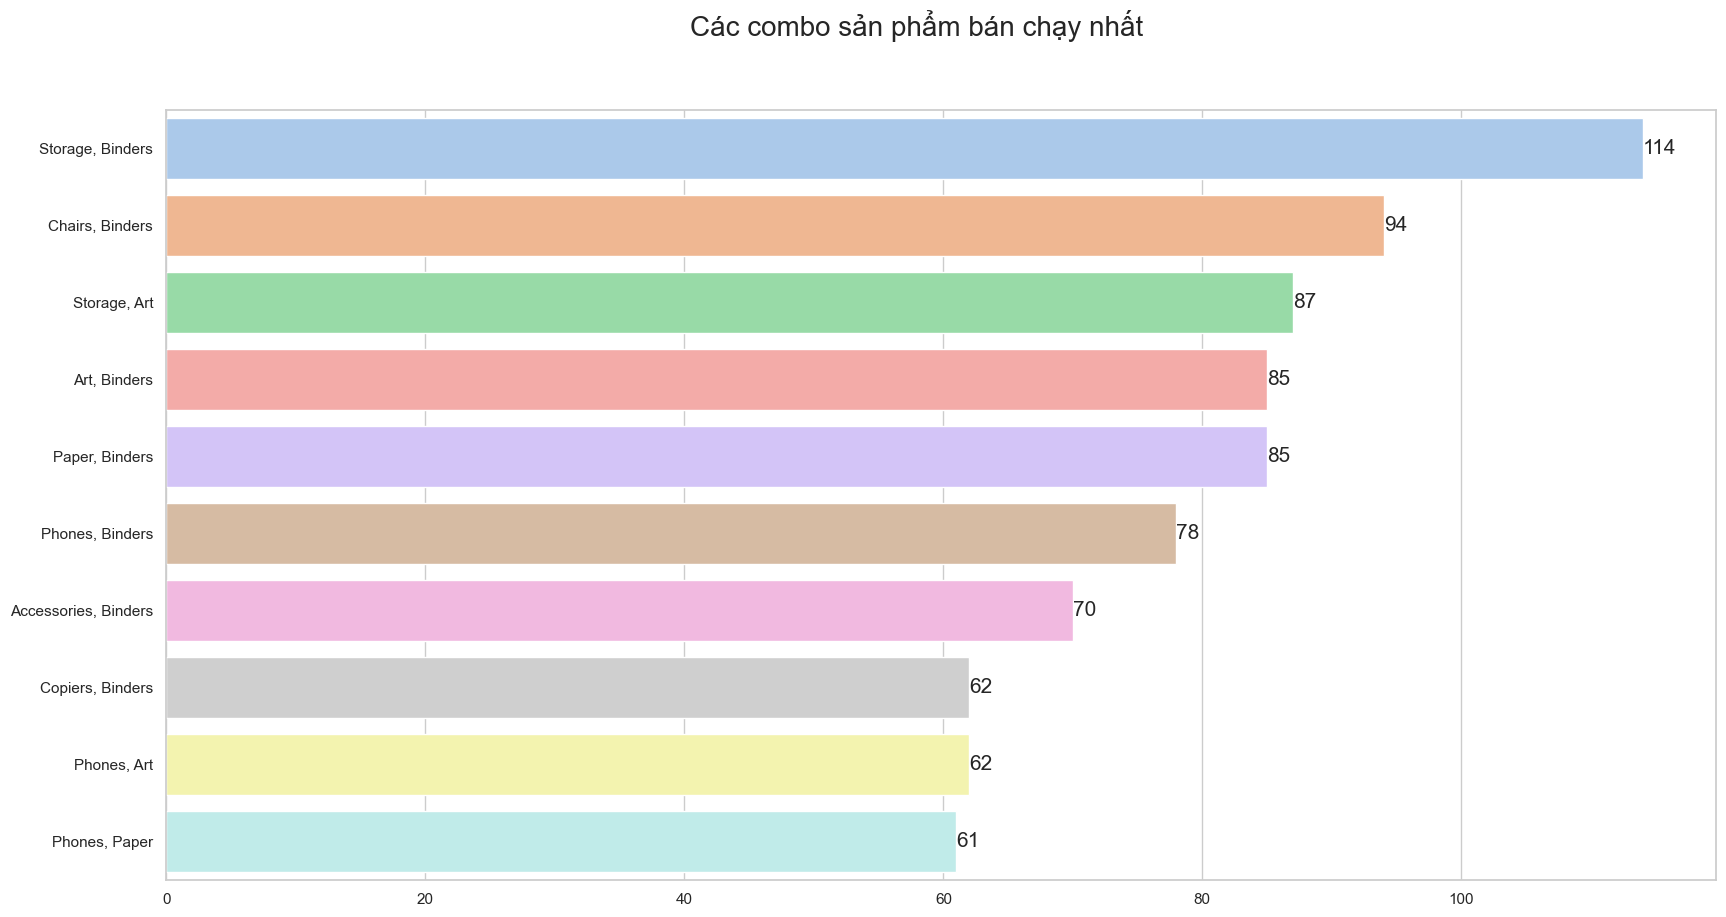

In [59]:
## Nhóm các sản phẩm theo order ID
df['All'] = df.groupby('Order ID')['Sub-Category'].transform(lambda x: ', '.join(x))
df1 = df[['Order ID', 'All']].drop_duplicates()
# df1
for i in df1['All']:
    if len(i.split(',')) == 1:
        df1.drop(df1.loc[df1['All'] == i].index, inplace=True)

combo = df1['All'].value_counts()
name = combo.index[0:1].tolist() + combo.index[2:8].tolist() + combo.index[10:13].tolist()
value = combo[0:1].tolist() + combo[2:8].tolist() + combo[10:13].tolist()


sns.set_theme(style="whitegrid", palette="pastel")
fig1 = plt.figure(figsize = (20,10))
plt.suptitle('Các combo sản phẩm bán chạy nhất', size = 20)
ax = sns.barplot(x = value, y = name)
for i in ax.containers:
    ax.bar_label(i,fontsize=15)
plt.show()

# Dự đoán

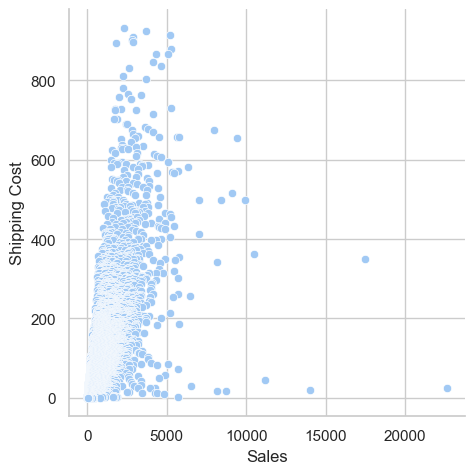

In [37]:
df2 = df.copy()
sns.relplot(x='Sales',y='Shipping Cost',data=df2)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

LE = LabelEncoder()
df2['Region'] = np.stack(LE.fit_transform(df2['Region']))
df2['Segment']= np.stack(LE.fit_transform(df2['Segment']))
df2['Ship Mode']= np.stack(LE.fit_transform(df2['Ship Mode']))
df2['Order Priority']=np.stack(LE.fit_transform(df2['Order Priority']))
# df.info()
train = df2.drop(['Order ID','Order Date','Ship Date','Customer Name','Customer ID','City','Country','Market','State','Product ID','Category','Sub-Category','Product Name','Sales','Year','Month','Segment','Region','Ship Mode','Order Priority','Profit'],axis=1)
test = df2['Sales']
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.3,random_state=3)
regressor=LinearRegression()
regressor.fit(X_train,y_train)
pred=regressor.predict(X_test)
print('Training accuracy:',regressor.score(X_test,y_test))
print('Training accuracy:',regressor.score(X_train,y_train))

Training accuracy: 0.6321047163683303
Training accuracy: 0.5876639665225832


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

LE = LabelEncoder()
df2['Region'] = np.stack(LE.fit_transform(df2['Region']))
df2['Segment']= np.stack(LE.fit_transform(df2['Segment']))
df2['Ship Mode']= np.stack(LE.fit_transform(df2['Ship Mode']))
df2['Order Priority']=np.stack(LE.fit_transform(df2['Order Priority']))
# df2.info()
train = df2.drop(['Order ID','Order Date','Ship Date','Customer Name','Customer ID','City','Country','Market','State','Product ID','Category','Sub-Category','Product Name','Sales'],axis=1)
test = df2['Sales']
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.3,random_state=3)
regressor=LinearRegression()
regressor.fit(X_train,y_train)
pred=regressor.predict(X_test)
print('Training accuracy:',regressor.score(X_test,y_test))
print('Training accuracy:',regressor.score(X_train,y_train))

Training accuracy: 0.718022812037064
Training accuracy: 0.6548559188706333


In [61]:
# Khu vực có doanh thu cao nhất theo từng tháng

area = df['Region'].unique()
years = np.arange(2011, 2015)
product_month_sale, product_month_sale_value = [], []
months = np.arange(1,13)

for i in years:
    for m in months:
        tmp, tmp1 = [], []
        for j in area:
            tmp.append(j)
            tmp1.append(round(np.sum(df['Sales'][(df['Region'] == j) & (df['Order Date'].dt.year == i) & (df['Order Date'].dt.month == m)]),2))
        idx = np.lexsort([tmp, tmp1])[::-1][0]
        product_month_sale.append(np.array(tmp)[idx])
        product_month_sale_value.append(np.array(tmp1)[idx])
        
area_2011 = product_month_sale[0:12]
area_2011_value = product_month_sale_value[0:12]
area_2012 = product_month_sale[12:24]
area_2012_value = product_month_sale_value[12:24]
area_2013 = product_month_sale[24:36]
area_2013_value = product_month_sale_value[24:36]
area_2014 = product_month_sale[36:48]
area_2014_value = product_month_sale_value[36:48]
print(area_2013)

['EU Central', 'Africa Africa', 'EU Central', 'EU Central', 'EU Central', 'EU Central', 'EU South', 'EU Central', 'EU Central', 'APAC Oceania', 'EU Central', 'EU Central']


In [ ]:
df